In this module, you will work on performing exploratory data analysis (EDA) to develop an initial report for your capstone project. You will use EDA to see what data can reveal beyond the formal modeling, hypothesis testing task, and data training to provide a better understanding of dataset variables and the relationships between them. You are encouraged to spend your time in this module cleaning your data and use feature engineering and EDA techniques to create visualizations to make sense of your findings. Additionally, you will also be required to use one of the ML algorithms you have learned so far in the program to develop a baseline model to use as a comparison in Module 24. You will have time in Module 24 to include additional models, clean the code, and make your work presentable for technical and non-technical audiences. For now, you will do the ‘heavy lifting’ of finding the answer to your research question.

The only deliverables for this module will be the Jupyter notebook(s) where you did your analysis and the updated README.md Download README.mdfile with the results section completed. If you have changed methodologies or datasets since Module 16, please make sure you reflect those changes in the README.md Download README.mdfile as well.

### Steps to predict whether a patient has CKD or not:

1. **Data Loading & Cleaning**
2. **Data Inspection & Quality Assessment**
3. **Missing Values Analysis**
4. **Distribution Analysis**
5. **Categorical Features Analysis**
6. **Correlation Analysis**
7. **Outlier Detection**
8. **Early Train-Test Split**
9. **Modular Preprocessing Pipeline**
10. **Feature Selection**
11. **Baseline Model Training**
12. **Model Evaluation**

##### 1. **Data Loading & Cleaning**


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
# Load the data  and treat missing values as NaN when reading the CSV.
df = pd.read_csv('data/chronic_kidney_disease.csv', na_values=['?', 'nan', 'NaN', ''])
print(f"Shape: {df.shape}")

Shape: (400, 26)


In [4]:
# Clean column names (remove quotes if present)
df.columns = df.columns.str.strip().str.replace("'", "")

# Convert numerical columns that might be read as strings
numerical_columns_to_convert = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                'hemo', 'pcv', 'wbcc', 'rbcc']

for col in numerical_columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
id         int64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object


In [5]:
# drop id column as it is the unique identifier
df.drop('id', axis = 1, inplace = True)

In [6]:
# rename column names
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

2. **Data Inspection & Quality Assessment**

In [7]:
# Inspect the structure
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head()


DATASET OVERVIEW

Shape: 400 rows × 25 columns

Column names:
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']

First few rows:


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
# Data types and basic info
print("="*60)
print("DATA TYPES AND INFO")
print("="*60)
df.info()


DATA TYPES AND INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemog

In [10]:
# Statistical summary for numerical columns
print("="*60)
print("STATISTICAL SUMMARY FOR NUMERICAL COLUMNS")
print("="*60)
df.describe()


STATISTICAL SUMMARY FOR NUMERICAL COLUMNS


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


3. **Missing Values Analysis**

In [11]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print(f"\nColumns with missing values ({len(missing_data)}):")
print(missing_data)


MISSING VALUES ANALYSIS

Columns with missing values (24):
                         Missing Count  Missing Percentage
red_blood_cells                    152               38.00
red_blood_cell_count               131               32.75
white_blood_cell_count             106               26.50
potassium                           88               22.00
sodium                              87               21.75
packed_cell_volume                  71               17.75
pus_cell                            65               16.25
haemoglobin                         52               13.00
sugar                               49               12.25
specific_gravity                    47               11.75
albumin                             46               11.50
blood_glucose_random                44               11.00
blood_urea                          19                4.75
serum_creatinine                    17                4.25
blood_pressure                      12                3.

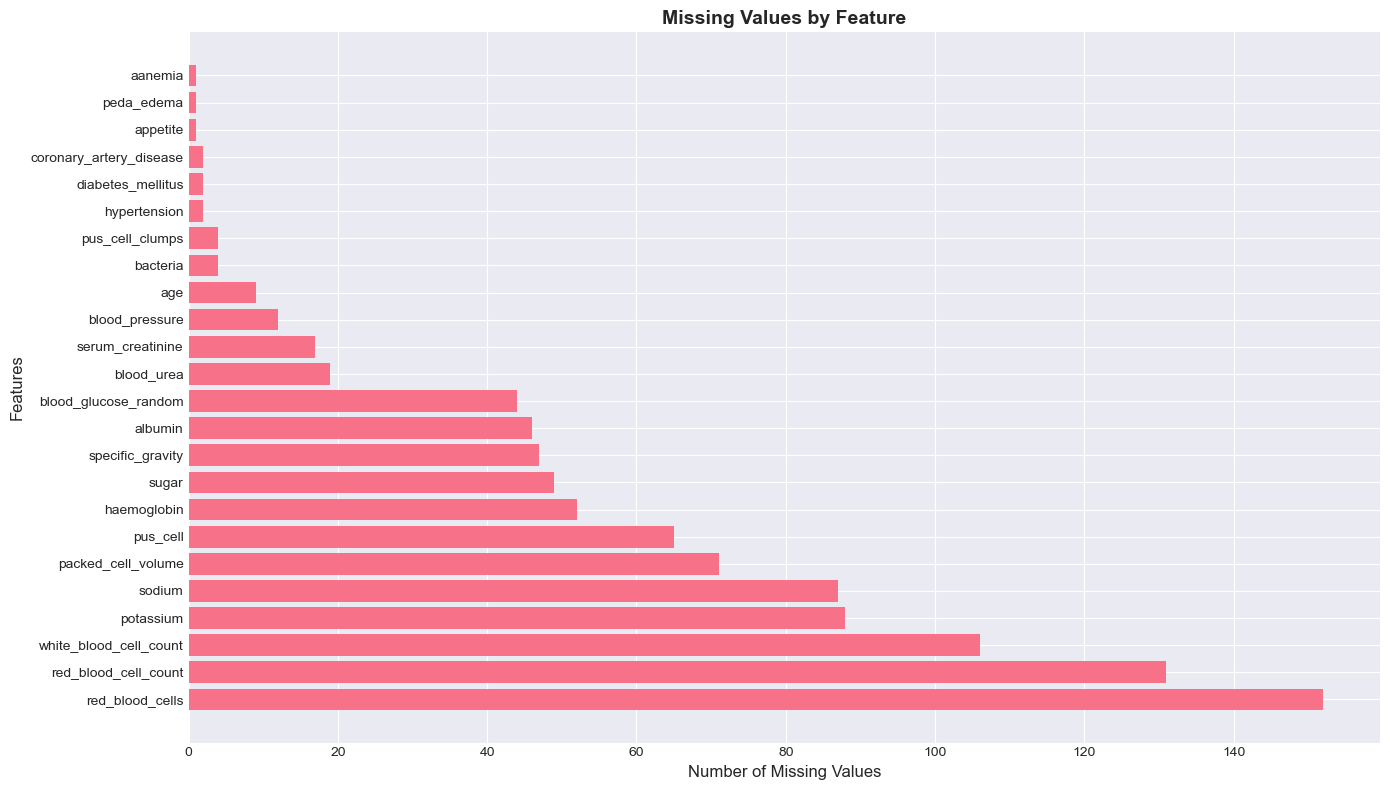

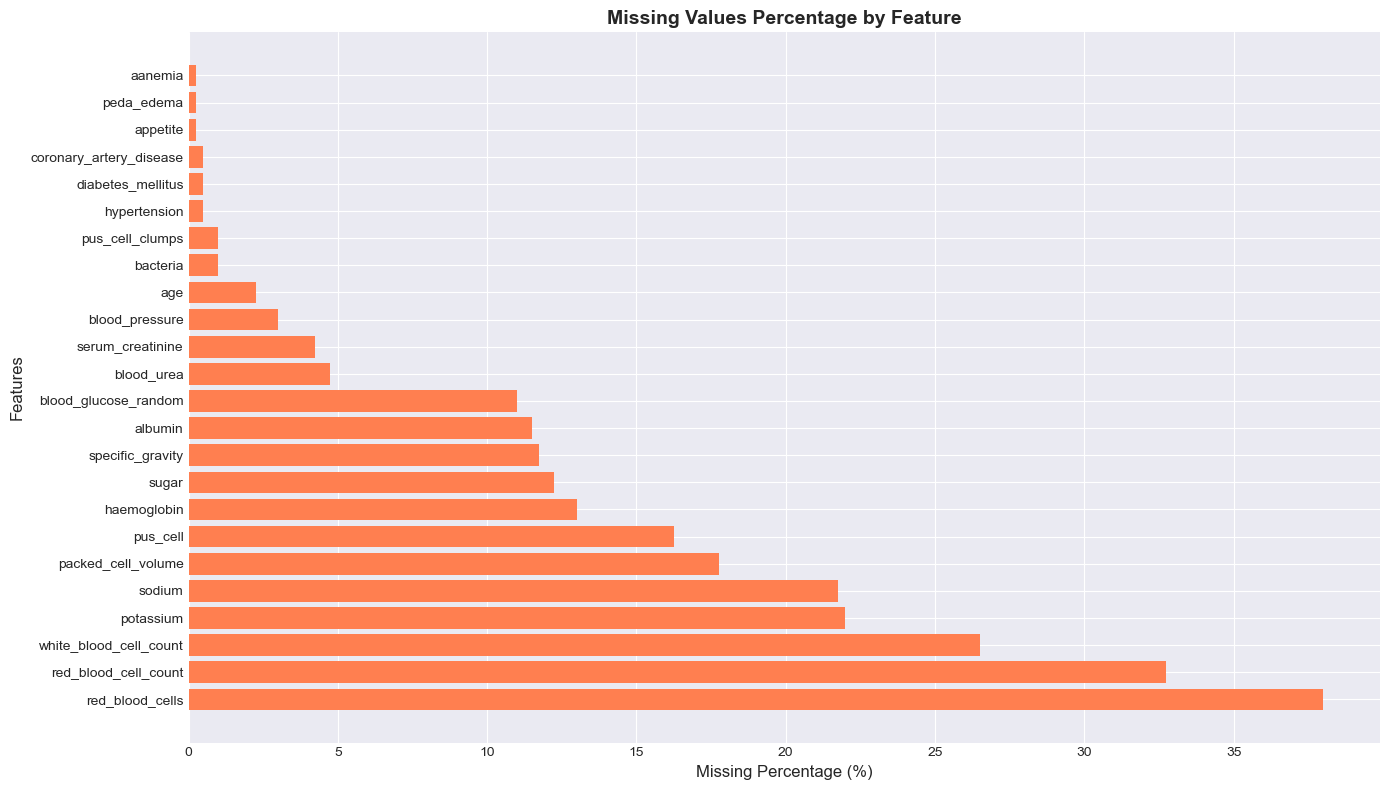

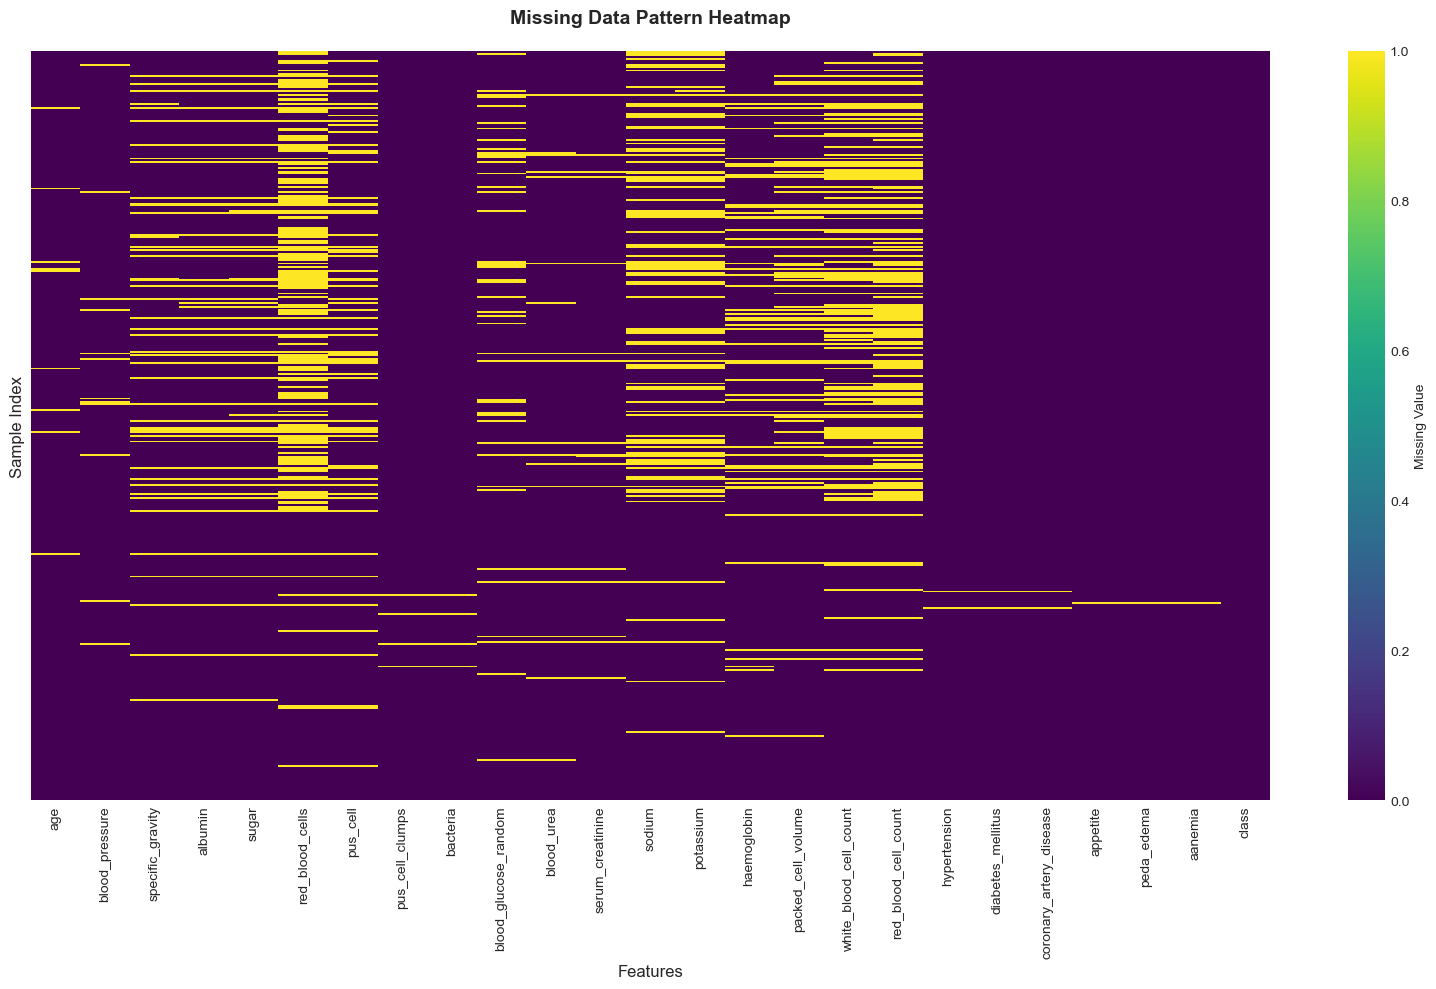

In [12]:
# Visualize missing data
plt.figure(figsize=(14, 8))
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
plt.barh(range(len(missing_counts)), missing_counts.values)
plt.yticks(range(len(missing_counts)), missing_counts.index)
plt.xlabel('Number of Missing Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/missing_values_count.png', dpi=300, bbox_inches='tight')
plt.show()

# Percentage visualization
plt.figure(figsize=(14, 8))
missing_pct = (df.isnull().sum() / len(df) * 100)
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
plt.barh(range(len(missing_pct)), missing_pct.values, color='coral')
plt.yticks(range(len(missing_pct)), missing_pct.index)
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/missing_values_percentage.png', dpi=300, bbox_inches='tight')
plt.show()

# Missing data heatmap
plt.figure(figsize=(16, 10))
missing_matrix = df.isnull()
sns.heatmap(missing_matrix, yticklabels=False, cbar=True, cmap='viridis', 
            cbar_kws={'label': 'Missing Value'})
plt.title('Missing Data Pattern Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Sample Index', fontsize=12)
plt.tight_layout()
plt.savefig('images/missing_data_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
# Check for duplicate rows
print("="*60)
print("DUPLICATE ROWS CHECK")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


DUPLICATE ROWS CHECK
Number of duplicate rows: 0


In [14]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("="*60)
print("FEATURE TYPES")
print("="*60)
print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols)
print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)


FEATURE TYPES

Numerical columns (14):
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical columns (11):
['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


TARGET VARIABLE ANALYSIS - CLASS

Target variable distribution:
class
ckd       250
notckd    150
Name: count, dtype: int64

Target variable percentages:
class
ckd       62.5
notckd    37.5
Name: proportion, dtype: float64


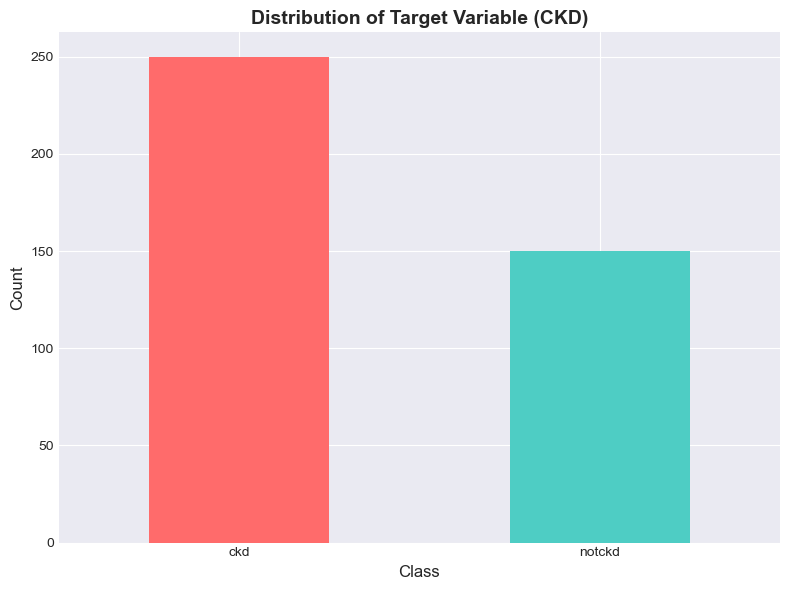

In [15]:
# Explore target variable
print("="*60)
print("TARGET VARIABLE ANALYSIS - CLASS")
print("="*60)
if 'class' in df.columns:
    print("\nTarget variable distribution:")
    print(df['class'].value_counts())
    print(f"\nTarget variable percentages:")
    print(df['class'].value_counts(normalize=True) * 100)
    
    # Visualize target distribution
    plt.figure(figsize=(8, 6))
    df['class'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
    plt.title('Distribution of Target Variable (CKD)', fontsize=14, fontweight='bold')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('images/target_variable_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()


4. **Distribution Analysis**

NUMERICAL FEATURES DISTRIBUTION


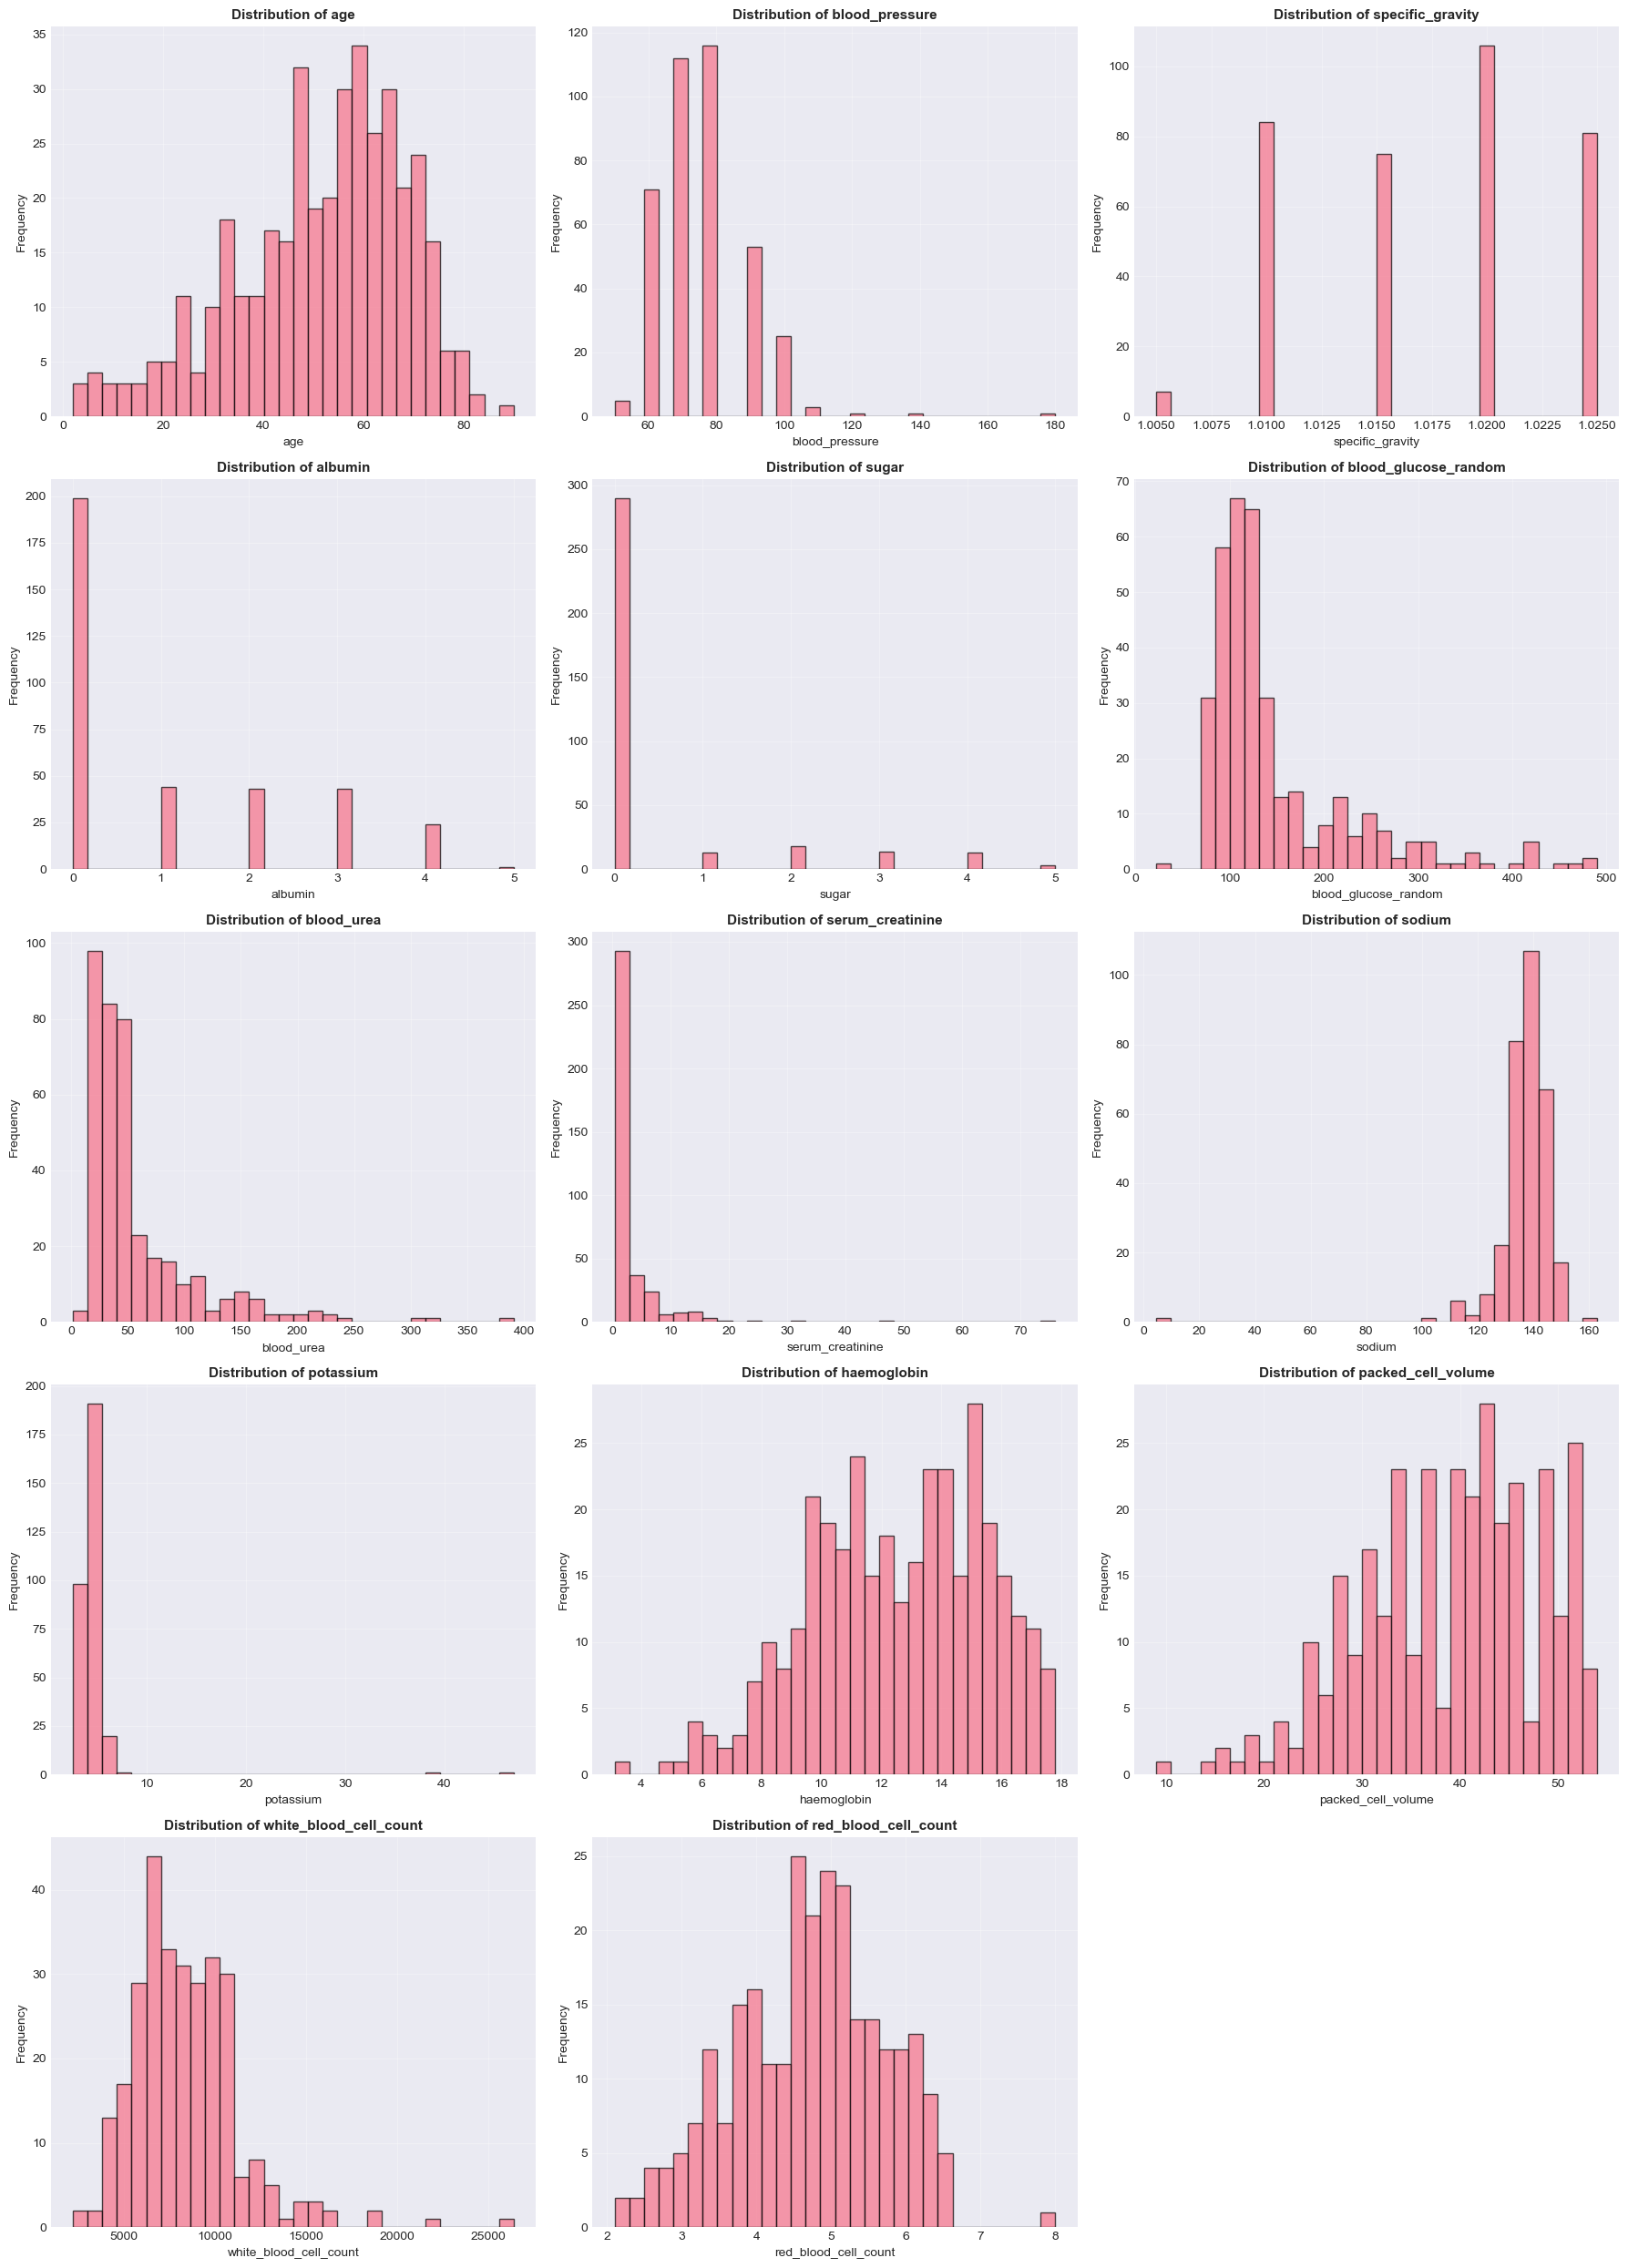

In [16]:
# Distribution of numerical features
print("="*60)
print("NUMERICAL FEATURES DISTRIBUTION")
print("="*60)

# Create distribution plots for numerical features
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('images/distribution_numerial_features.png', dpi=300, bbox_inches='tight')
plt.show()


NUMERICAL FEATURES BY TARGET VARIABLE


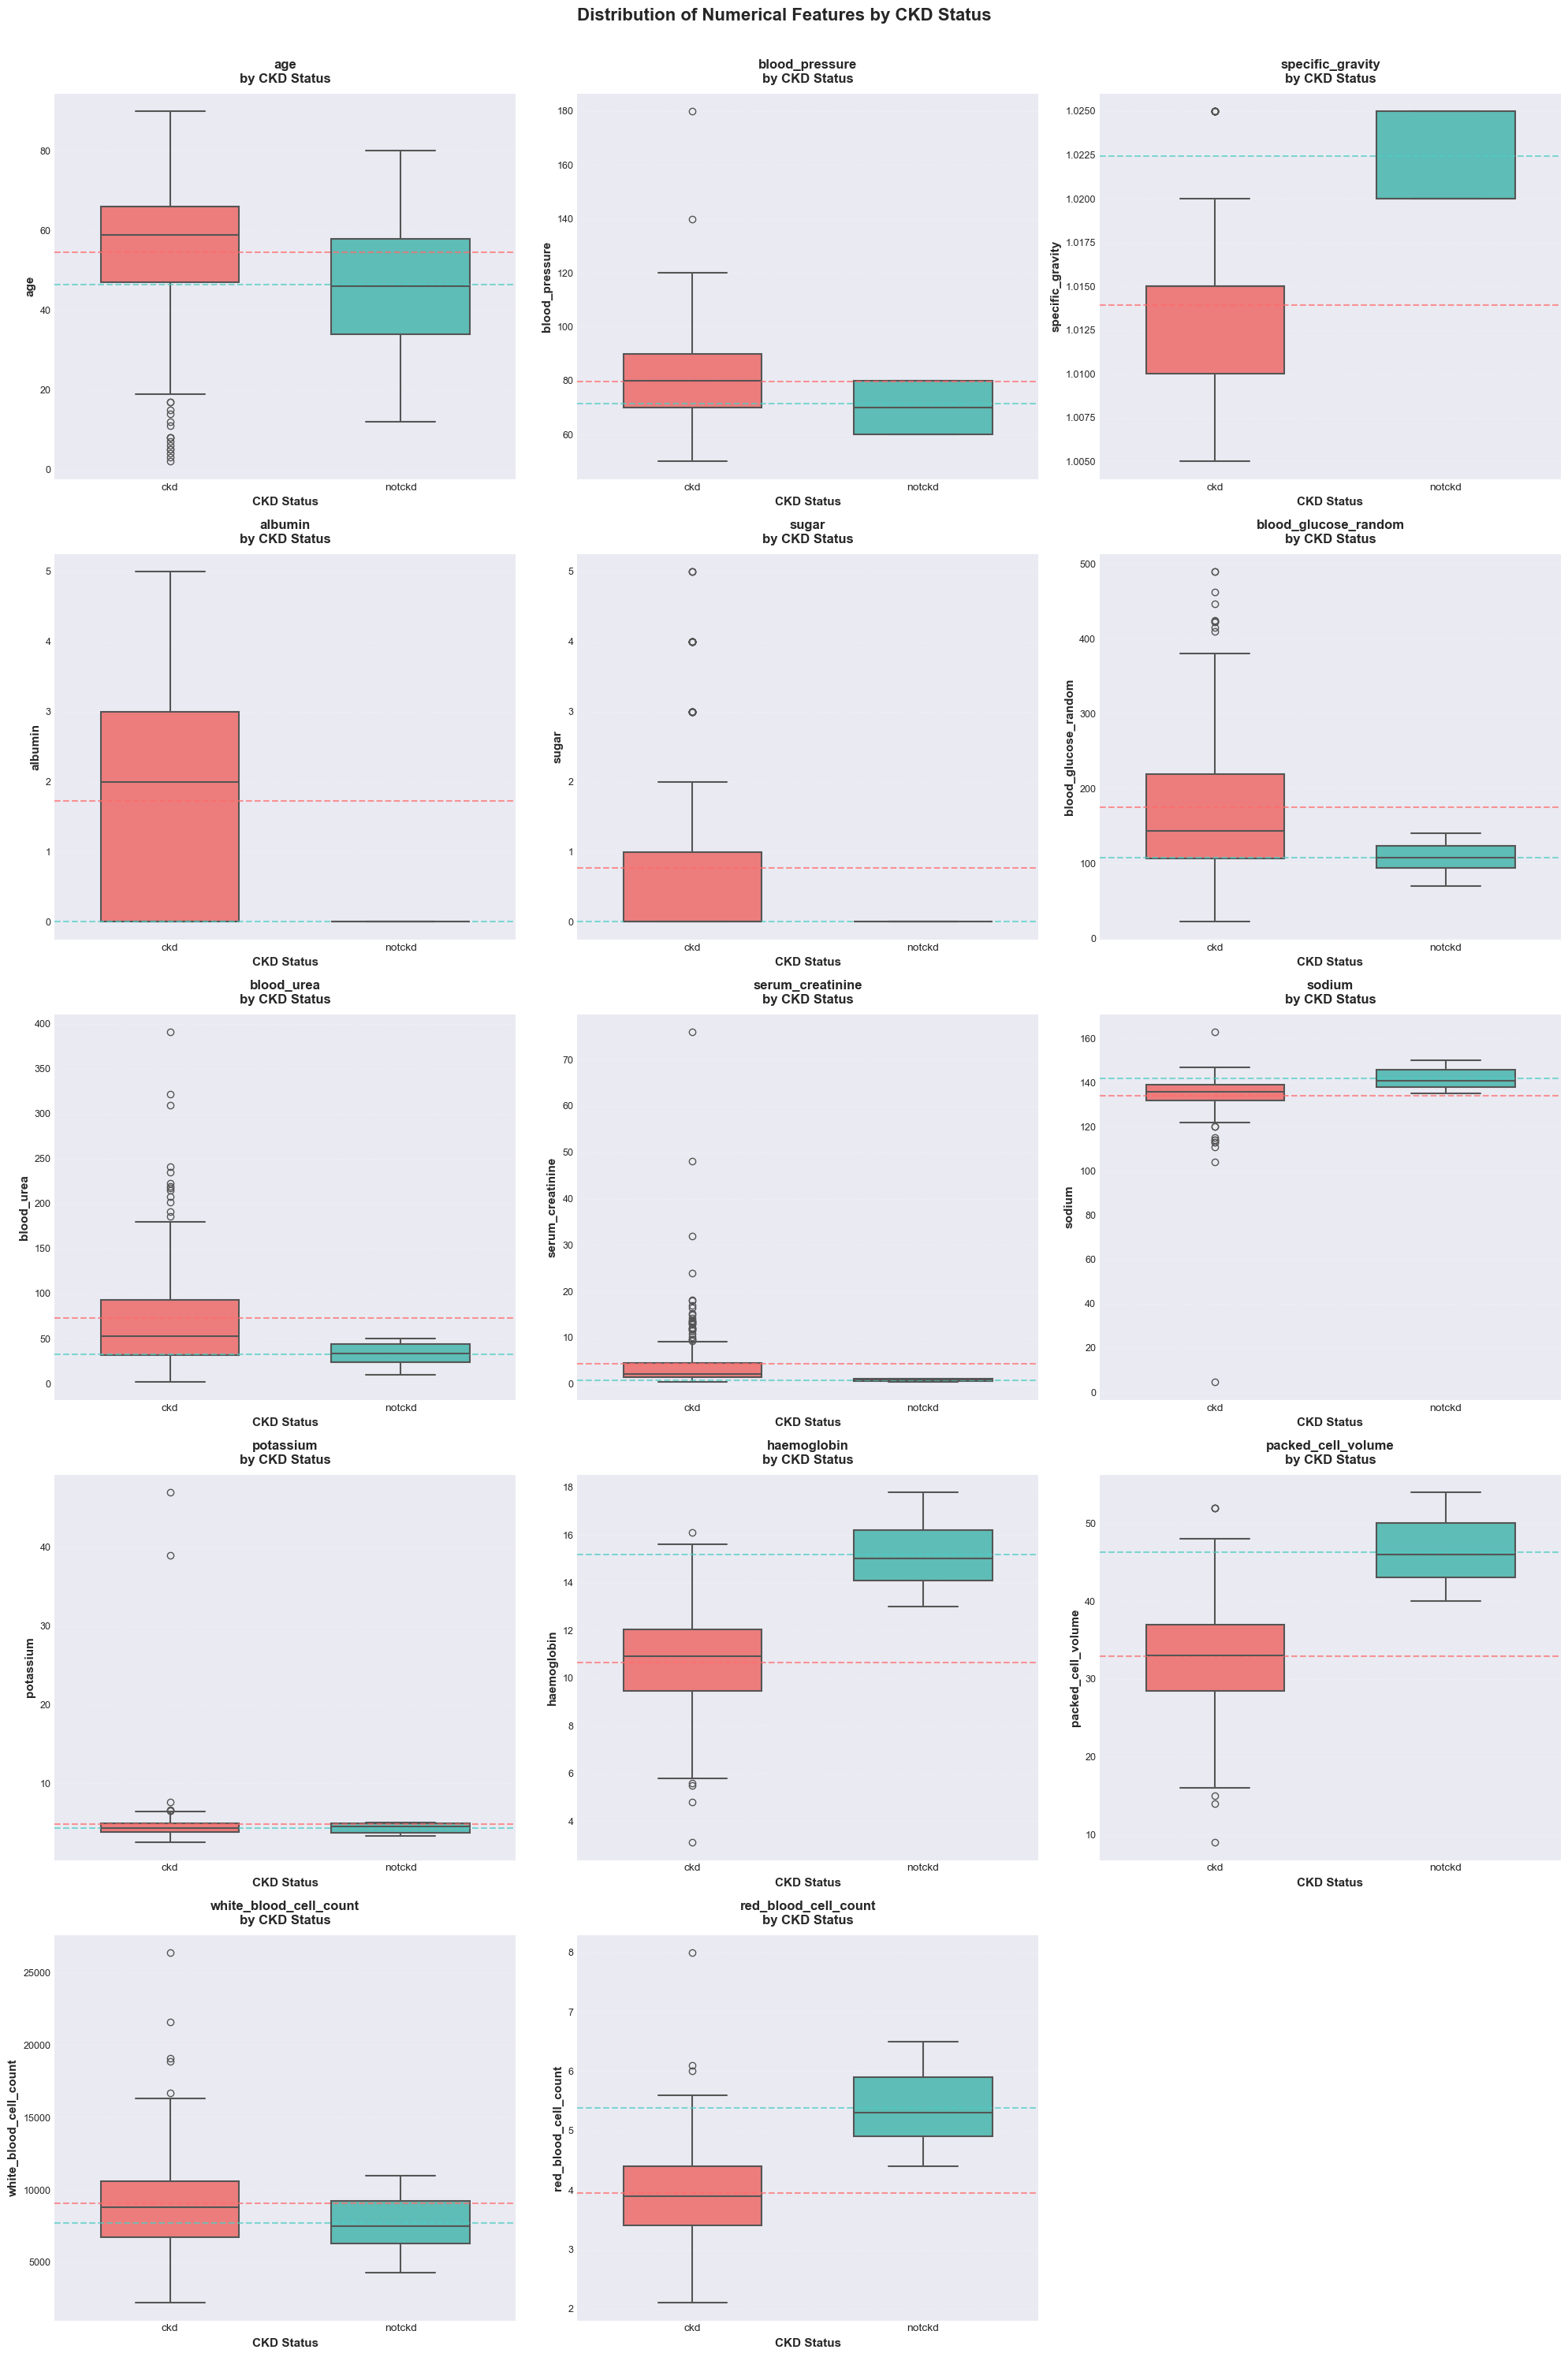


Visualization saved to 'images/boxplots_numerical_features_by_class.png'


In [17]:
# Box plots for numerical features by target variable
if 'class' in df.columns:
    print("="*60)
    print("NUMERICAL FEATURES BY TARGET VARIABLE")
    print("="*60)
    
    # Filter numerical columns that exist in dataframe
    numerical_cols_available = [col for col in numerical_cols if col in df.columns]
    
    n_cols = 3
    n_rows = (len(numerical_cols_available) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    # Define color palette for better contrast
    colors = ['#FF6B6B', '#4ECDC4']  # Red for CKD, Teal for Not CKD
    
    for idx, col in enumerate(numerical_cols_available):
        if idx < len(axes):
            # Use seaborn for better styling
            df_clean = df[[col, 'class']].dropna()
            if len(df_clean) > 0:
                sns.boxplot(data=df_clean, x='class', y=col, ax=axes[idx], 
                           palette=colors, width=0.6, linewidth=1.5)
                
                # Customize the plot
                axes[idx].set_title(f'{col}\nby CKD Status', fontsize=12, fontweight='bold', pad=10)
                axes[idx].set_xlabel('CKD Status', fontsize=11, fontweight='bold')
                axes[idx].set_ylabel(col, fontsize=11, fontweight='bold')
                
                # Rotate x-axis labels if needed
                axes[idx].tick_params(axis='x', labelsize=10)
                axes[idx].tick_params(axis='y', labelsize=9)
                
                # Add grid for better readability
                axes[idx].grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
                axes[idx].set_axisbelow(True)
                
                # Add mean markers for comparison
                for i, class_val in enumerate(df_clean['class'].unique()):
                    mean_val = df_clean[df_clean['class'] == class_val][col].mean()
                    axes[idx].axhline(y=mean_val, color=colors[i], linestyle='--', 
                                     linewidth=1.5, alpha=0.7, label=f'{class_val} Mean')
    
    # Hide empty subplots
    for idx in range(len(numerical_cols_available), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Distribution of Numerical Features by CKD Status', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig('images/boxplots_numerical_features_by_class.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nVisualization saved to 'images/boxplots_numerical_features_by_class.png'")


5. **Categorical Features Analysis**

In [18]:
# Categorical features analysis
print("="*60)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*60)

# Remove 'class' from categorical_cols for analysis
categorical_features = [col for col in categorical_cols if col != 'class']

for col in categorical_features:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


CATEGORICAL FEATURES ANALYSIS

red_blood_cells:
red_blood_cells
normal      201
abnormal     47
Name: count, dtype: int64
Unique values: 2

pus_cell:
pus_cell
normal      259
abnormal     76
Name: count, dtype: int64
Unique values: 2

pus_cell_clumps:
pus_cell_clumps
notpresent    354
present        42
Name: count, dtype: int64
Unique values: 2

bacteria:
bacteria
notpresent    374
present        22
Name: count, dtype: int64
Unique values: 2

hypertension:
hypertension
no     251
yes    147
Name: count, dtype: int64
Unique values: 2

diabetes_mellitus:
diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64
Unique values: 2

coronary_artery_disease:
coronary_artery_disease
no     364
yes     34
Name: count, dtype: int64
Unique values: 2

appetite:
appetite
good    317
poor     82
Name: count, dtype: int64
Unique values: 2

peda_edema:
peda_edema
no     323
yes     76
Name: count, dtype: int64
Unique values: 2

aanemia:
aanemia
no     339
yes     60
Name: count, dtype: int64
U

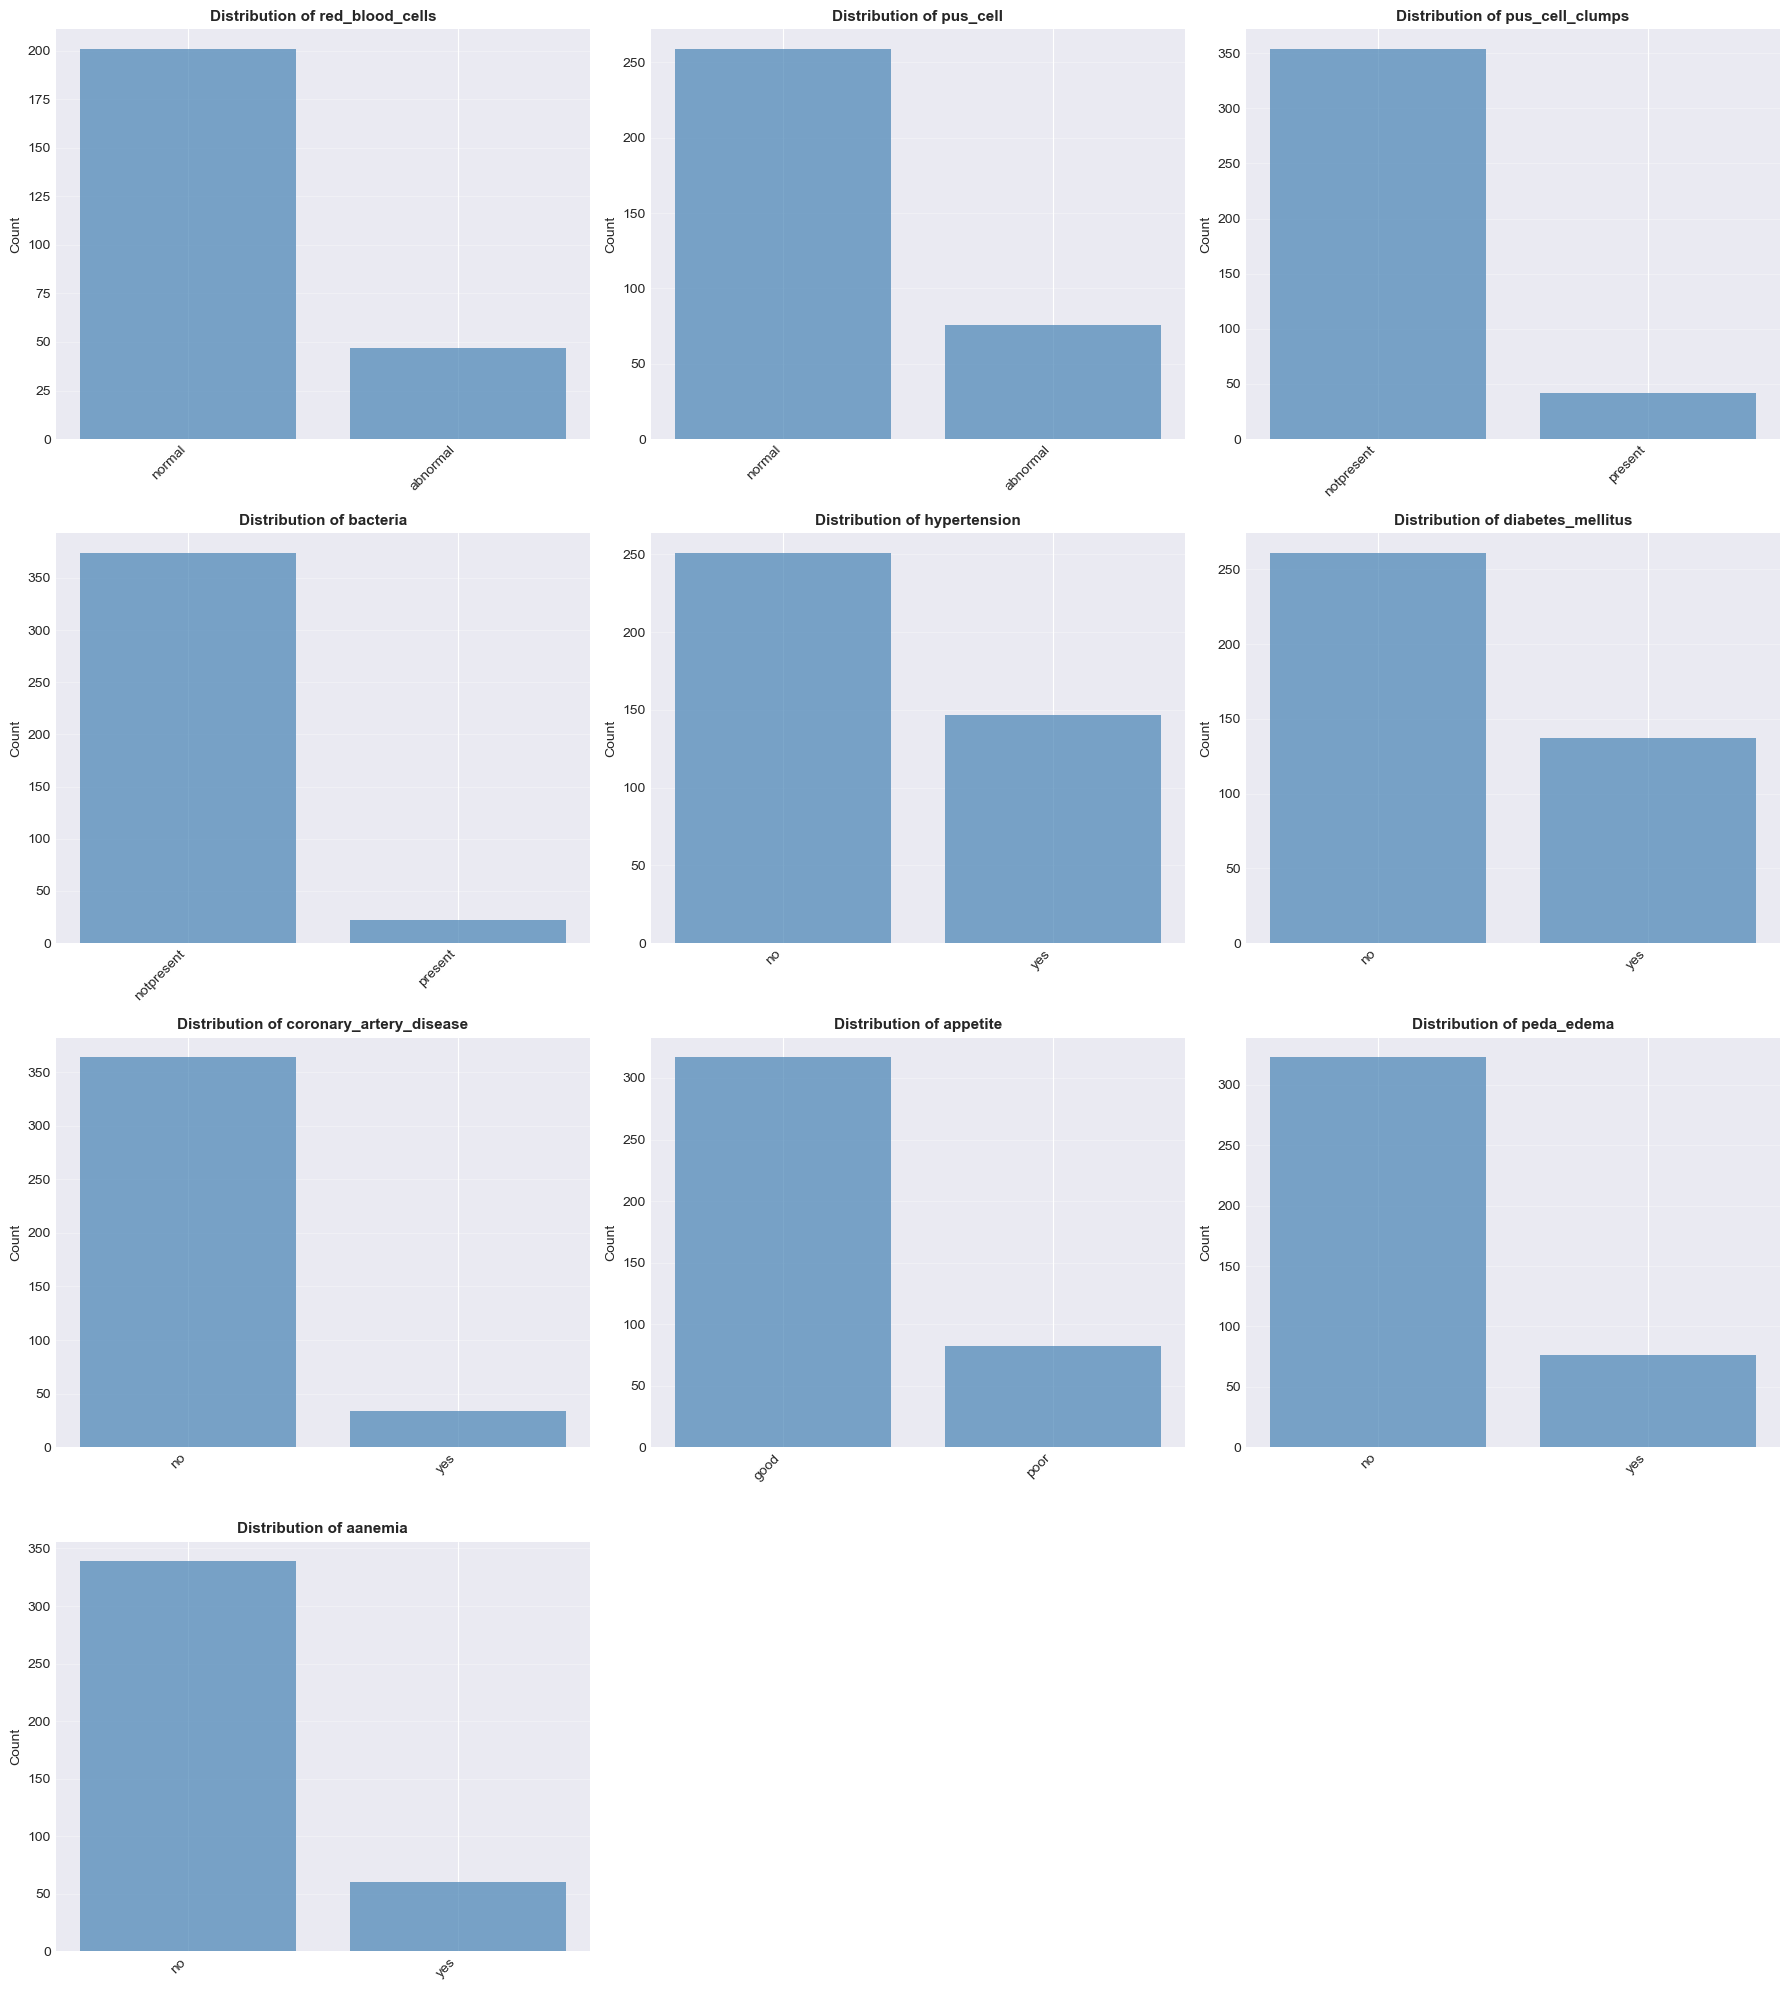

In [19]:
# Visualize categorical features
if 'class' in df.columns:
    n_cols = 3
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(categorical_features):
        if idx < len(axes):
            value_counts = df[col].value_counts()
            axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7)
            axes[idx].set_xticks(range(len(value_counts)))
            axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Count', fontsize=10)
            axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('images/categorical_features_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


CATEGORICAL FEATURES BY TARGET VARIABLE


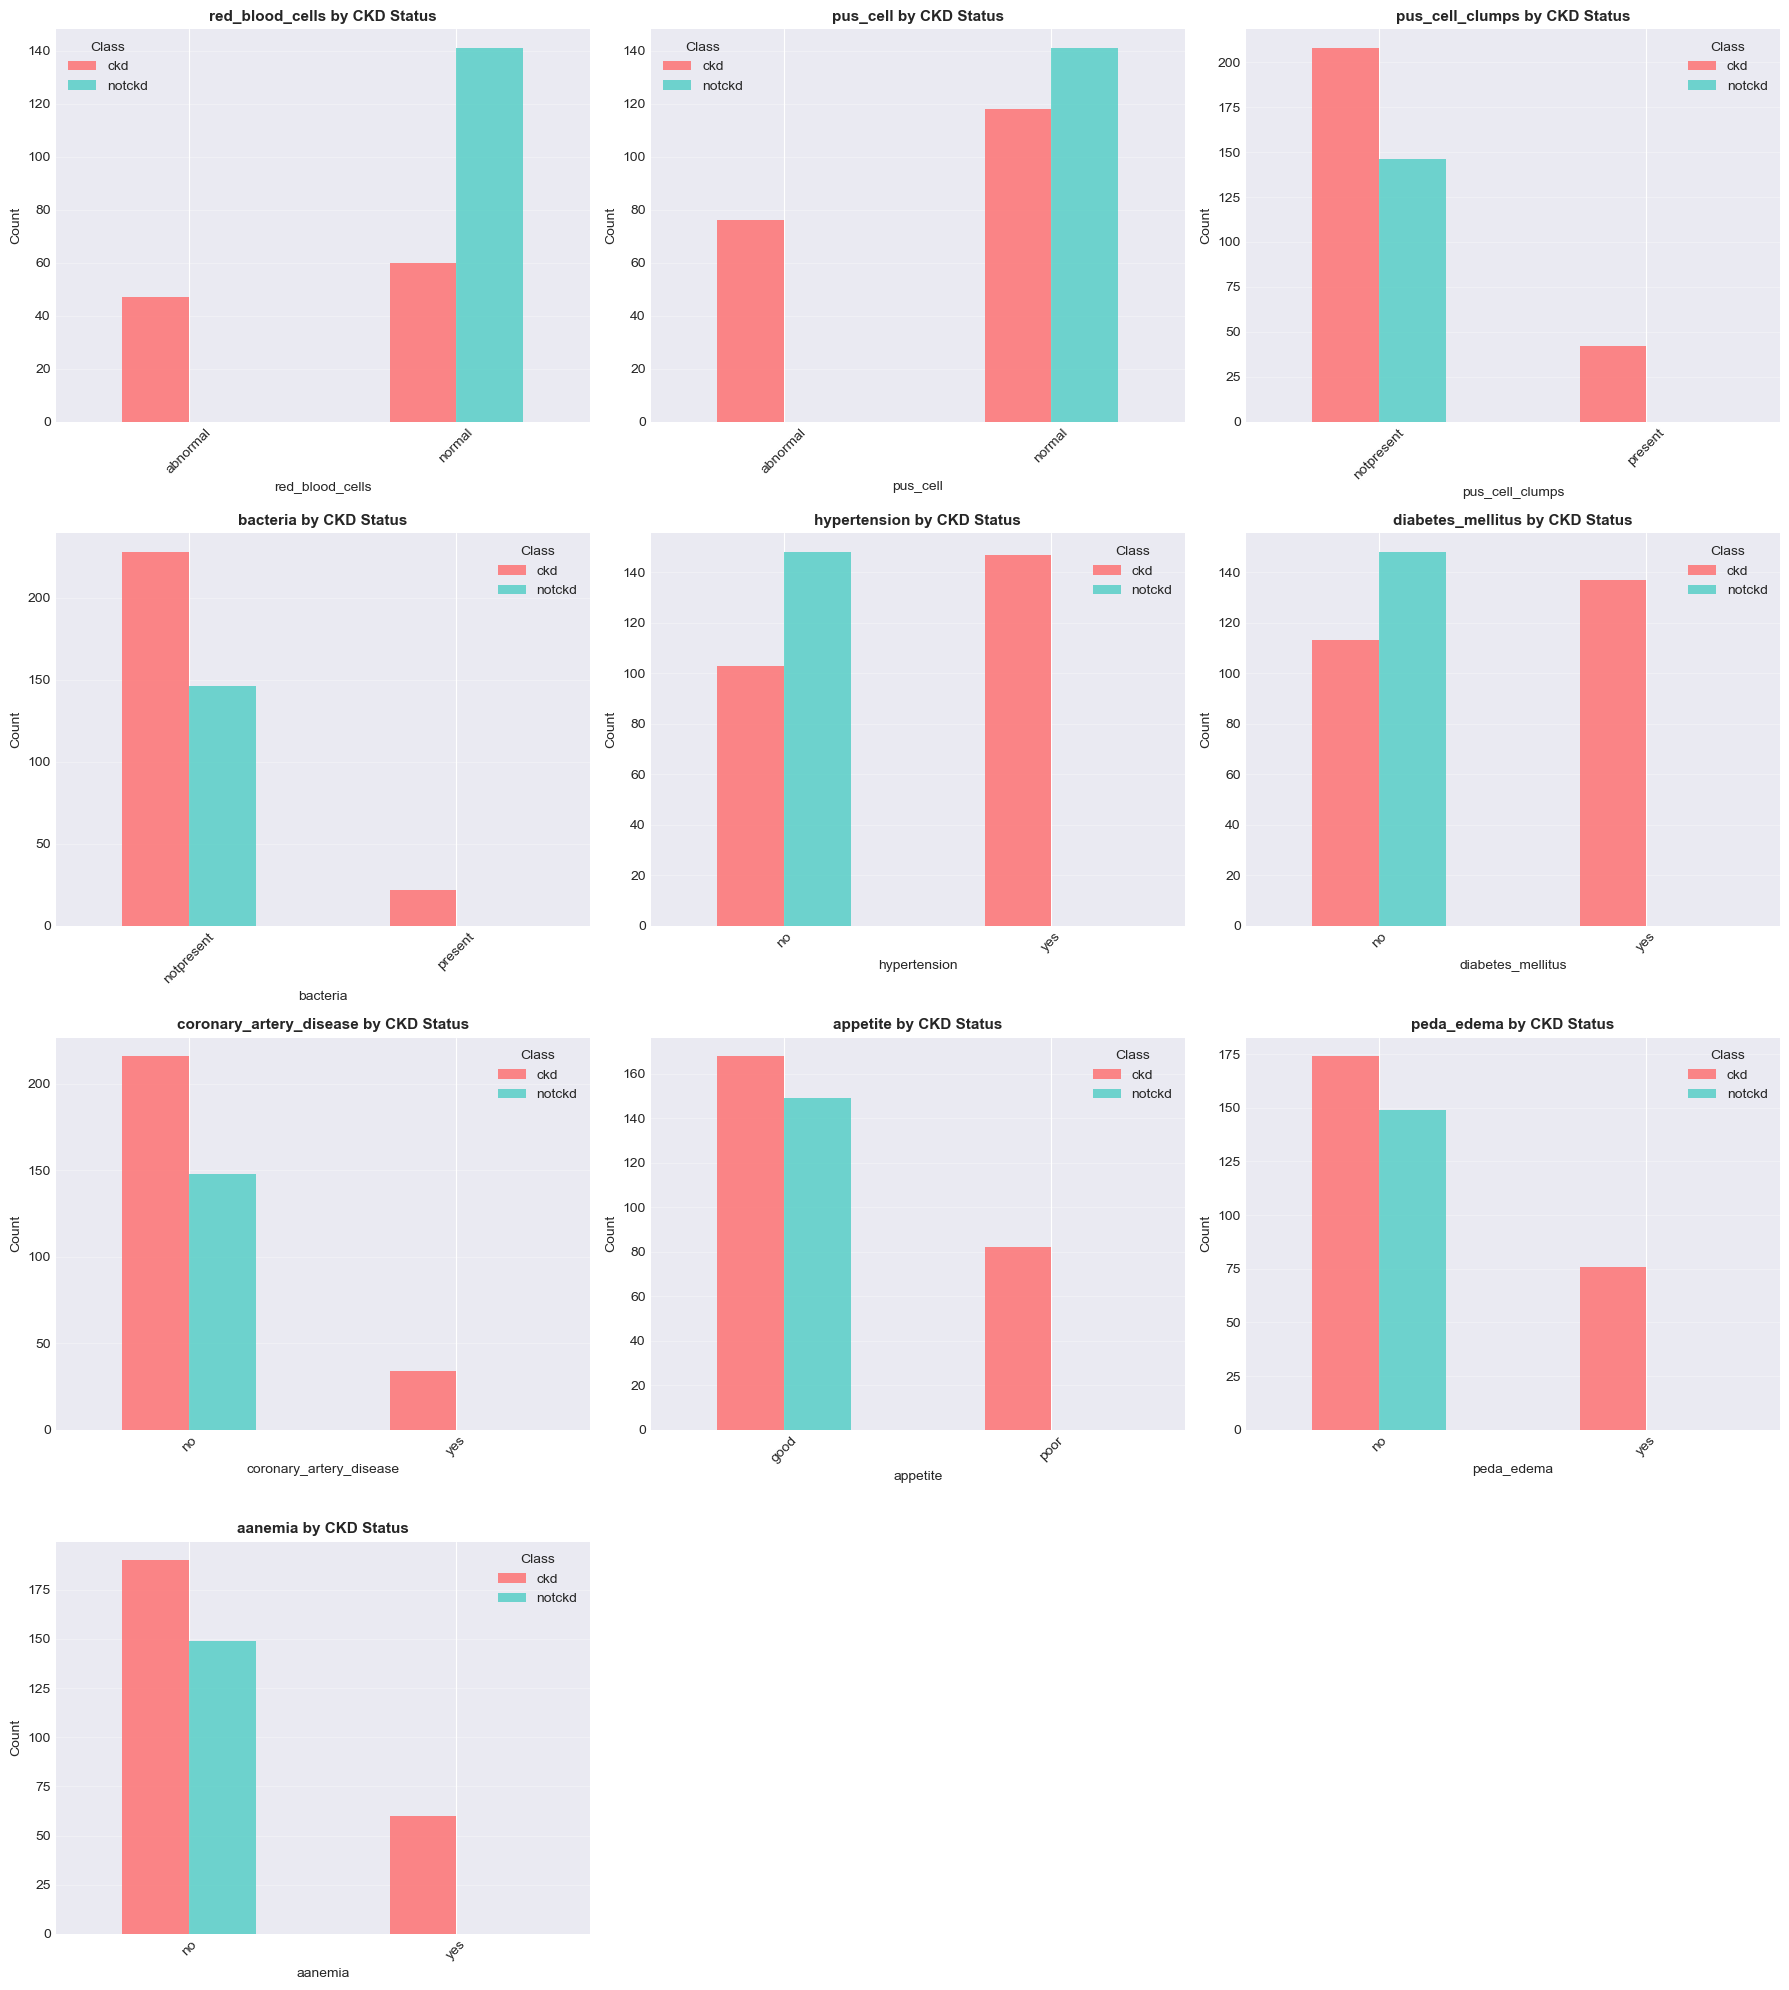

In [20]:
# Categorical features by target variable
if 'class' in df.columns:
    print("="*60)
    print("CATEGORICAL FEATURES BY TARGET VARIABLE")
    print("="*60)
    
    n_cols = 3
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(categorical_features):
        if idx < len(axes):
            crosstab = pd.crosstab(df[col], df['class'])
            crosstab.plot(kind='bar', ax=axes[idx], color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
            axes[idx].set_title(f'{col} by CKD Status', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel('Count', fontsize=10)
            axes[idx].legend(title='Class')
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('images/categorical_features_by_target.png', dpi=300, bbox_inches='tight')
    plt.show()


6. **Correlation Analysis**

CORRELATION ANALYSIS


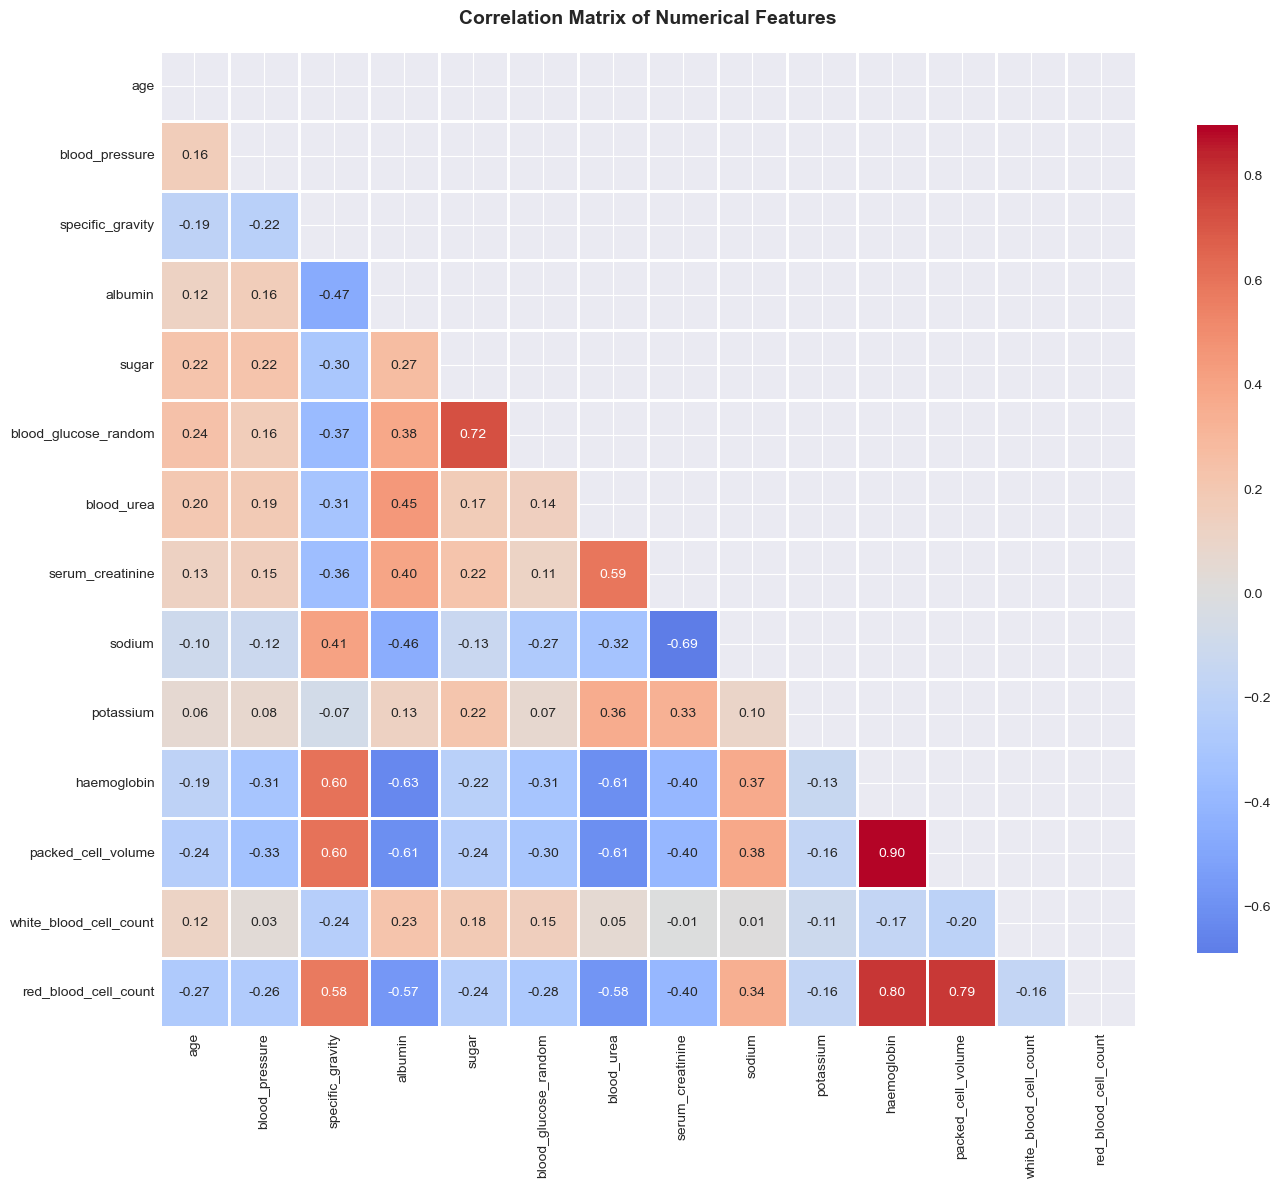


Highly correlated features (|correlation| > 0.7):
sugar - blood_glucose_random: 0.718
haemoglobin - packed_cell_volume: 0.895
haemoglobin - red_blood_cell_count: 0.799
packed_cell_volume - red_blood_cell_count: 0.792


In [21]:
# Correlation matrix for numerical features
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Find highly correlated features
print("\nHighly correlated features (|correlation| > 0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")


KEY FEATURES VS TARGET VARIABLE


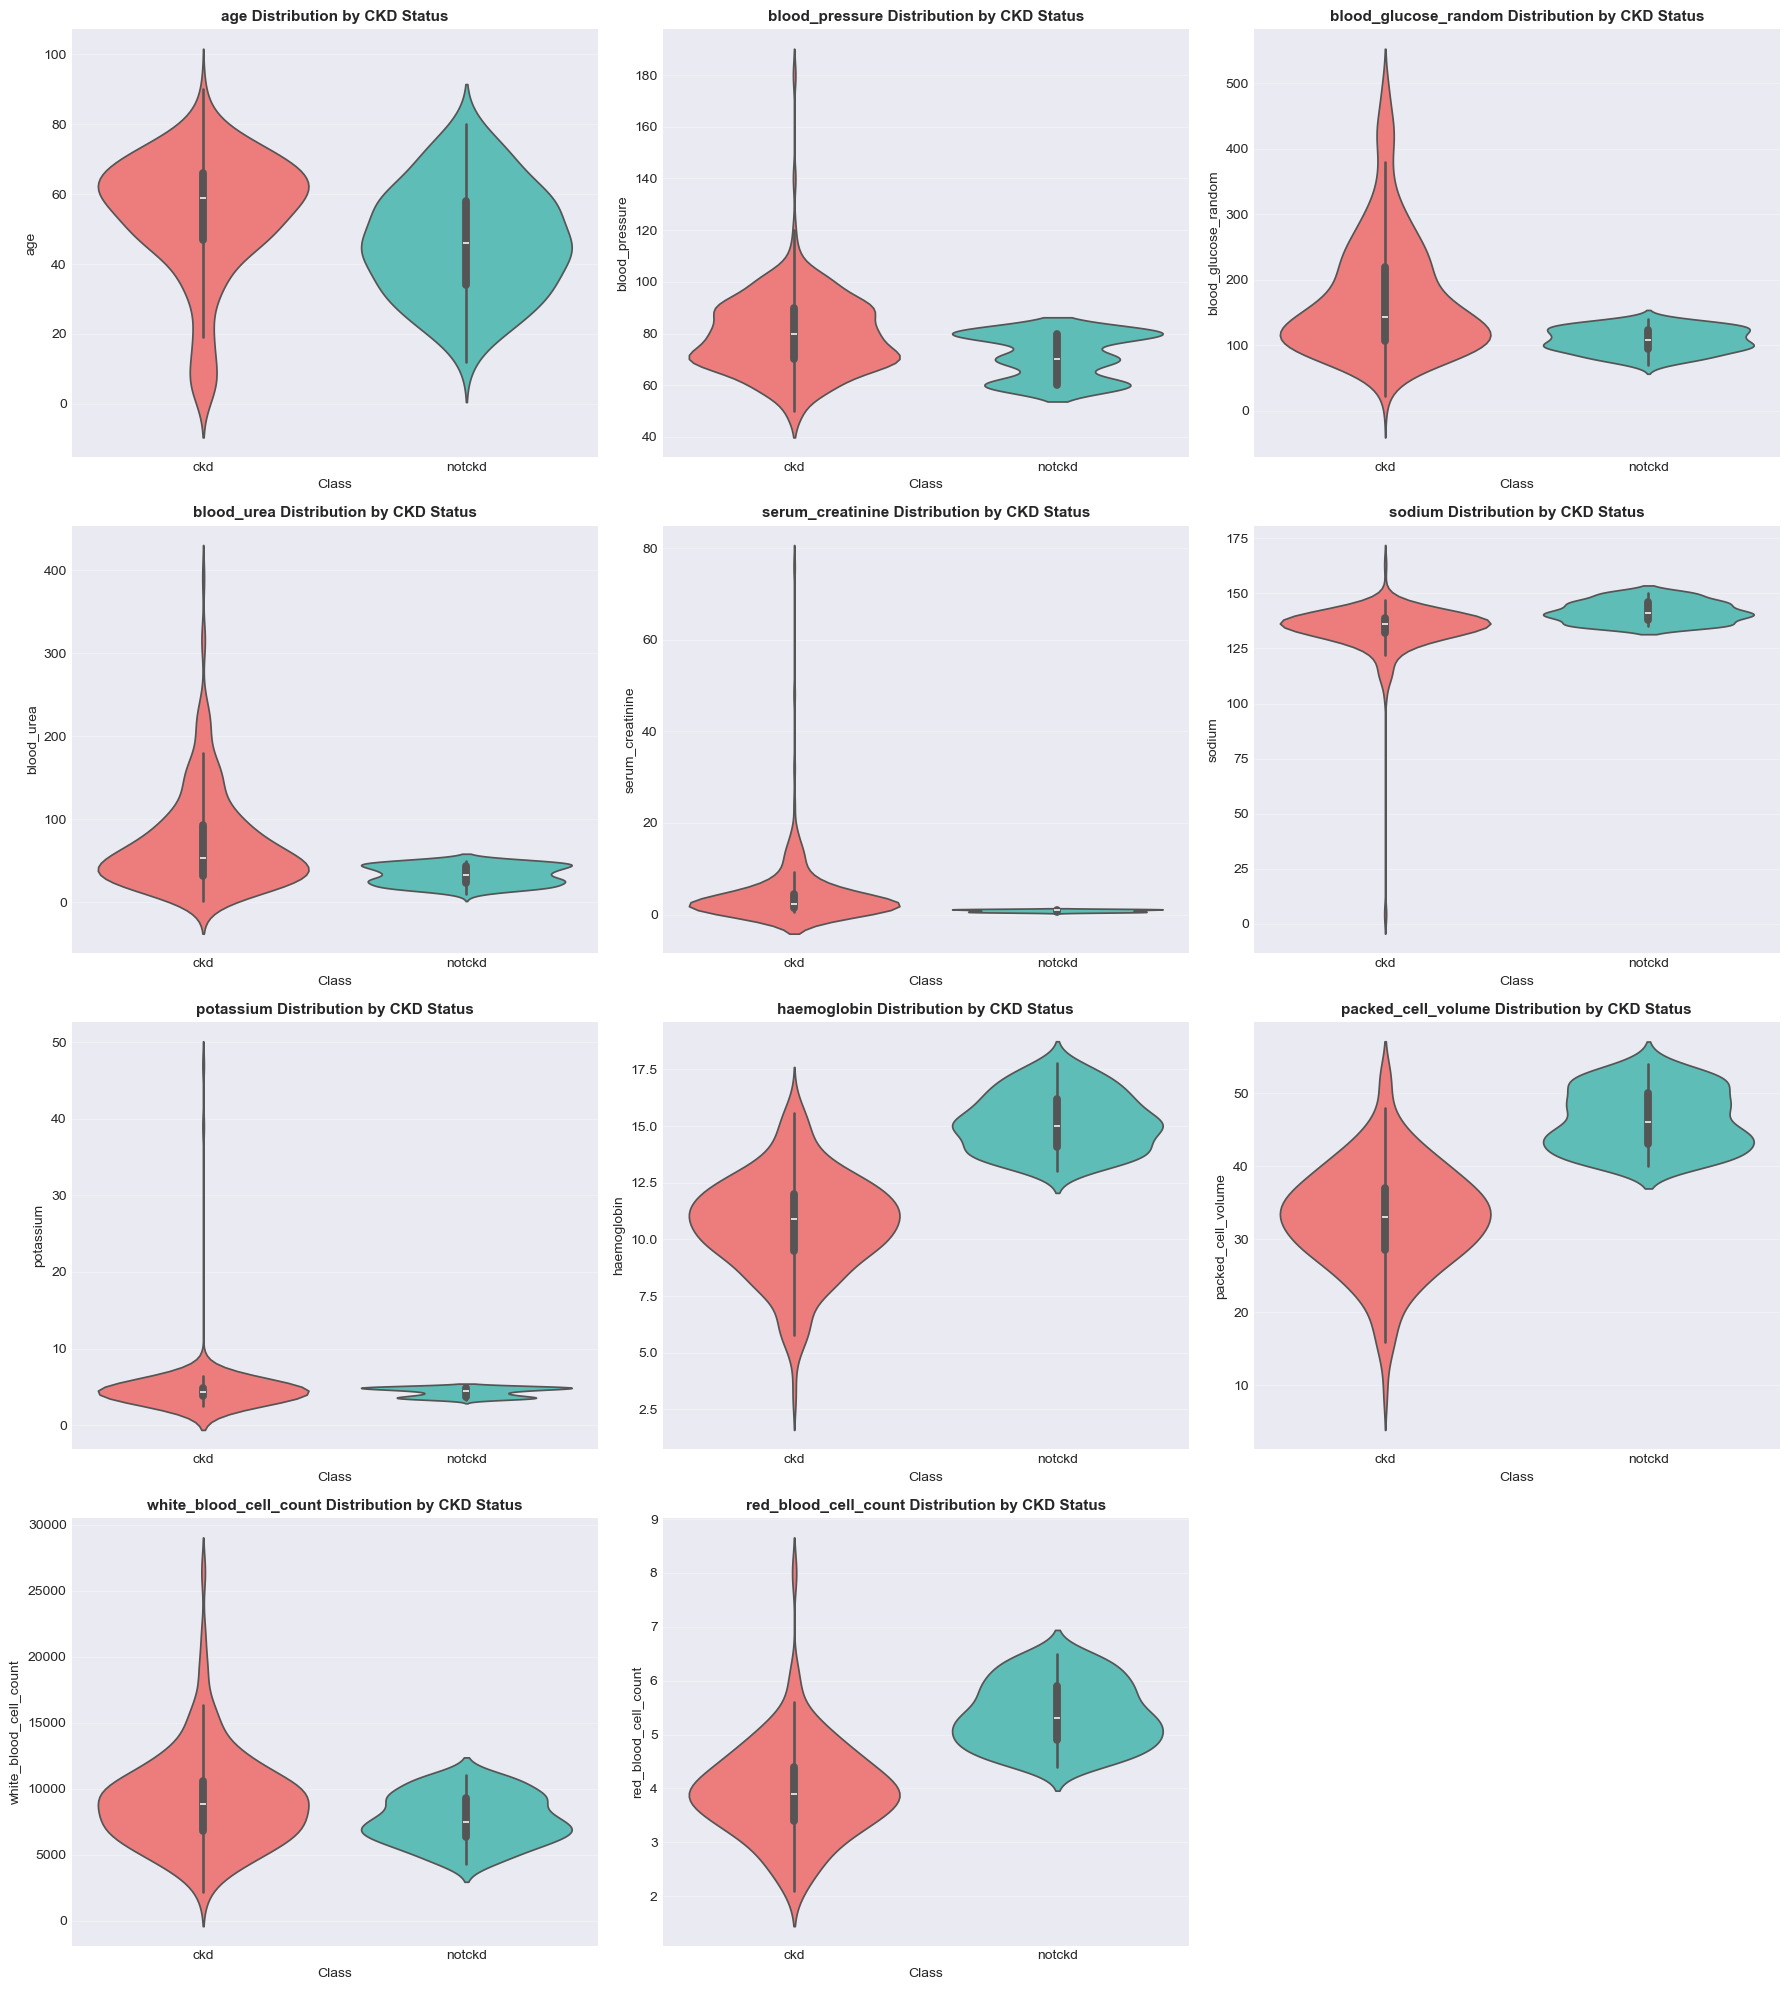


Visualization saved to 'images/relationship_numerical_features_target.png'

KEY FINDINGS FROM VIOLIN PLOTS

1. MOST DISCRIMINATIVE FEATURES (by mean difference %):
------------------------------------------------------------
   1. SERUM_CREATININE: 408.1% difference
      - CKD: Mean=4.41, Median=2.25, Skewness=6.23
      - Not CKD: Mean=0.87, Skewness=-0.10
   2. BLOOD_UREA: 120.7% difference
      - CKD: Mean=72.39, Median=53.00, Skewness=2.00
      - Not CKD: Mean=32.80, Skewness=-0.08
   3. BLOOD_GLUCOSE_RANDOM: 62.8% difference
      - CKD: Mean=175.42, Median=143.50, Skewness=1.33
      - Not CKD: Mean=107.72, Skewness=-0.12
   4. HAEMOGLOBIN: 29.9% difference
      - CKD: Mean=10.65, Median=10.90, Skewness=-0.32
      - Not CKD: Mean=15.19, Skewness=0.22
   5. PACKED_CELL_VOLUME: 28.9% difference
      - CKD: Mean=32.94, Median=33.00, Skewness=-0.19
      - Not CKD: Mean=46.34, Skewness=0.16

2. DISTRIBUTION SHAPE PATTERNS:
------------------------------------------------------

In [22]:
# Relationship between key numerical features and target
if 'class' in df.columns:
    print("="*60)
    print("KEY FEATURES VS TARGET VARIABLE")
    print("="*60)
    
    # Select key features for detailed analysis
    key_features = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
    key_features = [f for f in key_features if f in numerical_cols]
    
    n_cols = 3
    n_rows = (len(key_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(key_features):
        if idx < len(axes):
            # Create violin plot
            df_clean = df[[col, 'class']].dropna()
            if len(df_clean) > 0:
                sns.violinplot(data=df_clean, x='class', y=col, ax=axes[idx], palette=['#FF6B6B', '#4ECDC4'])
                axes[idx].set_title(f'{col} Distribution by CKD Status', fontsize=11, fontweight='bold')
                axes[idx].set_xlabel('Class', fontsize=10)
                axes[idx].set_ylabel(col, fontsize=10)
                axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(key_features), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('images/relationship_numerical_features_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nVisualization saved to 'images/relationship_numerical_features_target.png'")
    
    # Analyze and print findings from violin plots
    print("\n" + "="*60)
    print("KEY FINDINGS FROM VIOLIN PLOTS")
    print("="*60)
    
    from scipy import stats
    
    findings = []
    for col in key_features:
        if col not in df.columns:
            continue
        
        df_clean = df[[col, 'class']].dropna()
        if len(df_clean) == 0:
            continue
        
        ckd_data = df_clean[df_clean['class'] == 'ckd'][col]
        notckd_data = df_clean[df_clean['class'] == 'notckd'][col]
        
        if len(ckd_data) == 0 or len(notckd_data) == 0:
            continue
        
        ckd_mean = ckd_data.mean()
        notckd_mean = notckd_data.mean()
        ckd_median = ckd_data.median()
        notckd_skew = stats.skew(notckd_data)
        ckd_skew = stats.skew(ckd_data)
        mean_diff_pct = abs((ckd_mean - notckd_mean) / notckd_mean * 100) if notckd_mean != 0 else 0
        
        findings.append({
            'feature': col,
            'ckd_mean': ckd_mean,
            'notckd_mean': notckd_mean,
            'ckd_median': ckd_median,
            'ckd_skew': ckd_skew,
            'notckd_skew': notckd_skew,
            'mean_diff_pct': mean_diff_pct
        })
    
    # Sort by mean difference percentage (most discriminative first)
    findings.sort(key=lambda x: x['mean_diff_pct'], reverse=True)
    
    print("\n1. MOST DISCRIMINATIVE FEATURES (by mean difference %):")
    print("-" * 60)
    for i, f in enumerate(findings[:5], 1):
        print(f"   {i}. {f['feature'].upper()}: {f['mean_diff_pct']:.1f}% difference")
        print(f"      - CKD: Mean={f['ckd_mean']:.2f}, Median={f['ckd_median']:.2f}, Skewness={f['ckd_skew']:.2f}")
        print(f"      - Not CKD: Mean={f['notckd_mean']:.2f}, Skewness={f['notckd_skew']:.2f}")
    
    print("\n2. DISTRIBUTION SHAPE PATTERNS:")
    print("-" * 60)
    
    # Categorize by skewness
    highly_right_skewed = [f for f in findings if f['ckd_skew'] > 1.0]
    highly_left_skewed = [f for f in findings if f['ckd_skew'] < -1.0]
    approximately_normal = [f for f in findings if -0.5 <= f['ckd_skew'] <= 0.5]
    
    if highly_right_skewed:
        print("   Highly Right-Skewed (>1.0) - Progressive disease pattern:")
        for f in highly_right_skewed:
            print(f"      - {f['feature']}: skewness={f['ckd_skew']:.2f}")
        print("      -> Most CKD patients have moderate values, few very high (advanced disease)")
        print("      -> Action: Apply log transformation for modeling")
    
    if highly_left_skewed:
        print("\n   Highly Left-Skewed (<-1.0) - Unusual patterns:")
        for f in highly_left_skewed:
            print(f"      - {f['feature']}: skewness={f['ckd_skew']:.2f}")
        print("      -> Most values clustered high, some very low")
        print("      -> Action: Investigate and consider special handling")
    
    if approximately_normal:
        print("\n   Approximately Normal (-0.5 to 0.5) - Consistent patterns:")
        for f in approximately_normal:
            print(f"      - {f['feature']}: skewness={f['ckd_skew']:.2f}")
        print("      -> Consistent distributions, clear separation")
        print("      -> Action: No transformation needed")
    
    print("\n3. CLINICAL INSIGHTS:")
    print("-" * 60)
    
    # Find kidney function markers
    kidney_markers = [f for f in findings if f['feature'] in ['serum_creatinine', 'blood_urea']]
    if kidney_markers:
        print("   Kidney Function Markers:")
        for f in kidney_markers:
            print(f"      - {f['feature']}: {f['mean_diff_pct']:.1f}% higher in CKD")
        print("      -> Clear kidney dysfunction, highly predictive")
        print("      -> Right-skewed pattern indicates disease progression stages")
    
    # Find blood cell parameters
    blood_cell = [f for f in findings if f['feature'] in ['haemoglobin', 'packed_cell_volume', 'red_blood_cell_count']]
    if blood_cell:
        print("\n   Blood Cell Parameters:")
        for f in blood_cell:
            print(f"      - {f['feature']}: {f['mean_diff_pct']:.1f}% lower in CKD")
        print("      -> Consistent anemia pattern in CKD patients")
        print("      -> Normal distributions suggest uniform anemia")
        print("      -> Action: Consider combining into 'blood_cell_score'")
    
    # Find electrolytes
    electrolytes = [f for f in findings if f['feature'] in ['sodium', 'potassium']]
    if electrolytes:
        print("\n   Electrolytes:")
        for f in electrolytes:
            pattern = "left-skewed" if f['ckd_skew'] < -1 else "right-skewed" if f['ckd_skew'] > 1 else "normal"
            print(f"      - {f['feature']}: {pattern} (skewness={f['ckd_skew']:.2f})")
        print("      -> Extreme patterns suggest subgroups with severe imbalances")
        print("      -> Action: May need special transformation or binning")
    
    print("\n4. MODELING RECOMMENDATIONS:")
    print("-" * 60)
    print("   Top Predictors (focus on these):")
    for f in findings[:3]:
        print(f"      - {f['feature']}: {f['mean_diff_pct']:.1f}% difference")
    
    print("\n   Features Needing Transformation:")
    transform_features = [f for f in findings if abs(f['ckd_skew']) > 1.0]
    for f in transform_features[:5]:
        print(f"      - {f['feature']}: log transformation (skewness={f['ckd_skew']:.2f})")
    
    print("\n   Feature Engineering Opportunities:")
    print("      - Combine kidney function markers (serum_creatinine + blood_urea)")
    print("      - Combine blood cell parameters (haemoglobin + pcv + rbcc)")
    print("      - Create electrolyte imbalance flags for extreme values")
    print("      - Consider CKD staging based on creatinine levels")
    
    print("\n" + "="*60)


7. **Outlier Detection**

OUTLIER DETECTION

Outliers detected (IQR method):
                        count  percentage
sugar                    61.0   17.378917
serum_creatinine         51.0   13.315927
blood_urea               38.0    9.973753
blood_pressure           36.0    9.278351
blood_glucose_random     34.0    9.550562
sodium                   16.0    5.111821
age                      10.0    2.557545
white_blood_cell_count   10.0    3.401361
potassium                 4.0    1.282051
haemoglobin               1.0    0.287356
packed_cell_volume        1.0    0.303951
red_blood_cell_count      1.0    0.371747


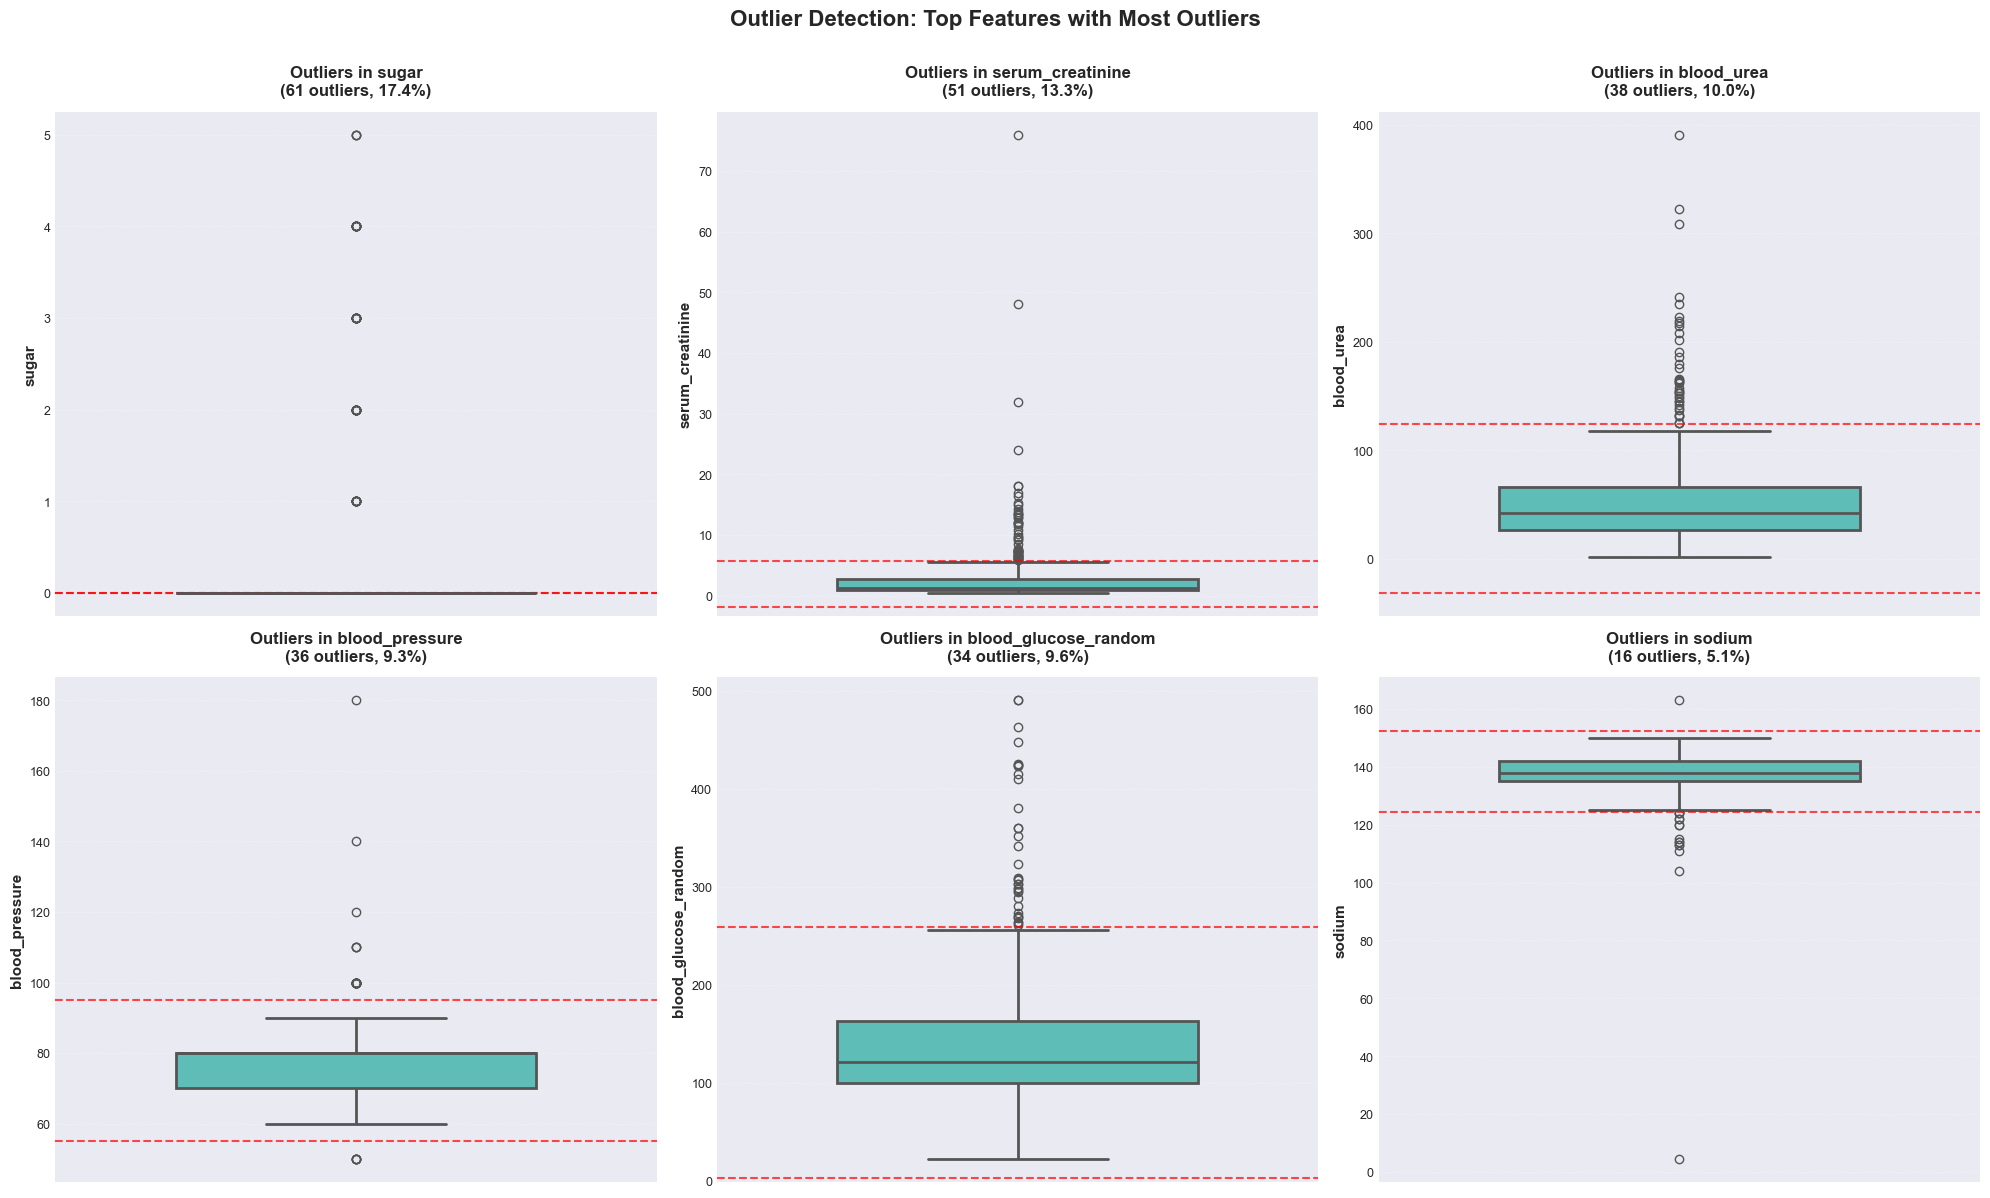


Visualization saved to 'images/boxplots_outlier_detection.png'


In [23]:
# Outlier detection using IQR method
print("="*60)
print("OUTLIER DETECTION")
print("="*60)

outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': (outlier_count / len(df[col].dropna())) * 100 if len(df[col].dropna()) > 0 else 0
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutliers detected (IQR method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outliers for top features - IMPROVED VERSION
top_outlier_features = outlier_df.head(6).index.tolist()
if top_outlier_features:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(top_outlier_features):
        if idx < len(axes):
            # Use seaborn for better styling
            df_clean = df[col].dropna()
            if len(df_clean) > 0:
                sns.boxplot(y=df_clean, ax=axes[idx], color='#4ECDC4', width=0.6, linewidth=2)
                
                # Customize the plot
                axes[idx].set_title(f'Outliers in {col}\n({outlier_summary[col]["count"]} outliers, {outlier_summary[col]["percentage"]:.1f}%)', 
                                   fontsize=12, fontweight='bold', pad=12)
                axes[idx].set_ylabel(col, fontsize=11, fontweight='bold')
                axes[idx].set_xlabel('')
                
                # Improve tick labels
                axes[idx].tick_params(axis='y', labelsize=9)
                
                # Add grid for better readability
                axes[idx].grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
                axes[idx].set_axisbelow(True)
                
                # Mark outliers with IQR bounds
                Q1 = df_clean.quantile(0.25)
                Q3 = df_clean.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                axes[idx].axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Lower Bound')
                axes[idx].axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Upper Bound')
    
    plt.suptitle('Outlier Detection: Top Features with Most Outliers', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig('images/boxplots_outlier_detection.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nVisualization saved to 'images/boxplots_outlier_detection.png'")


PAIR PLOT OF KEY FEATURES


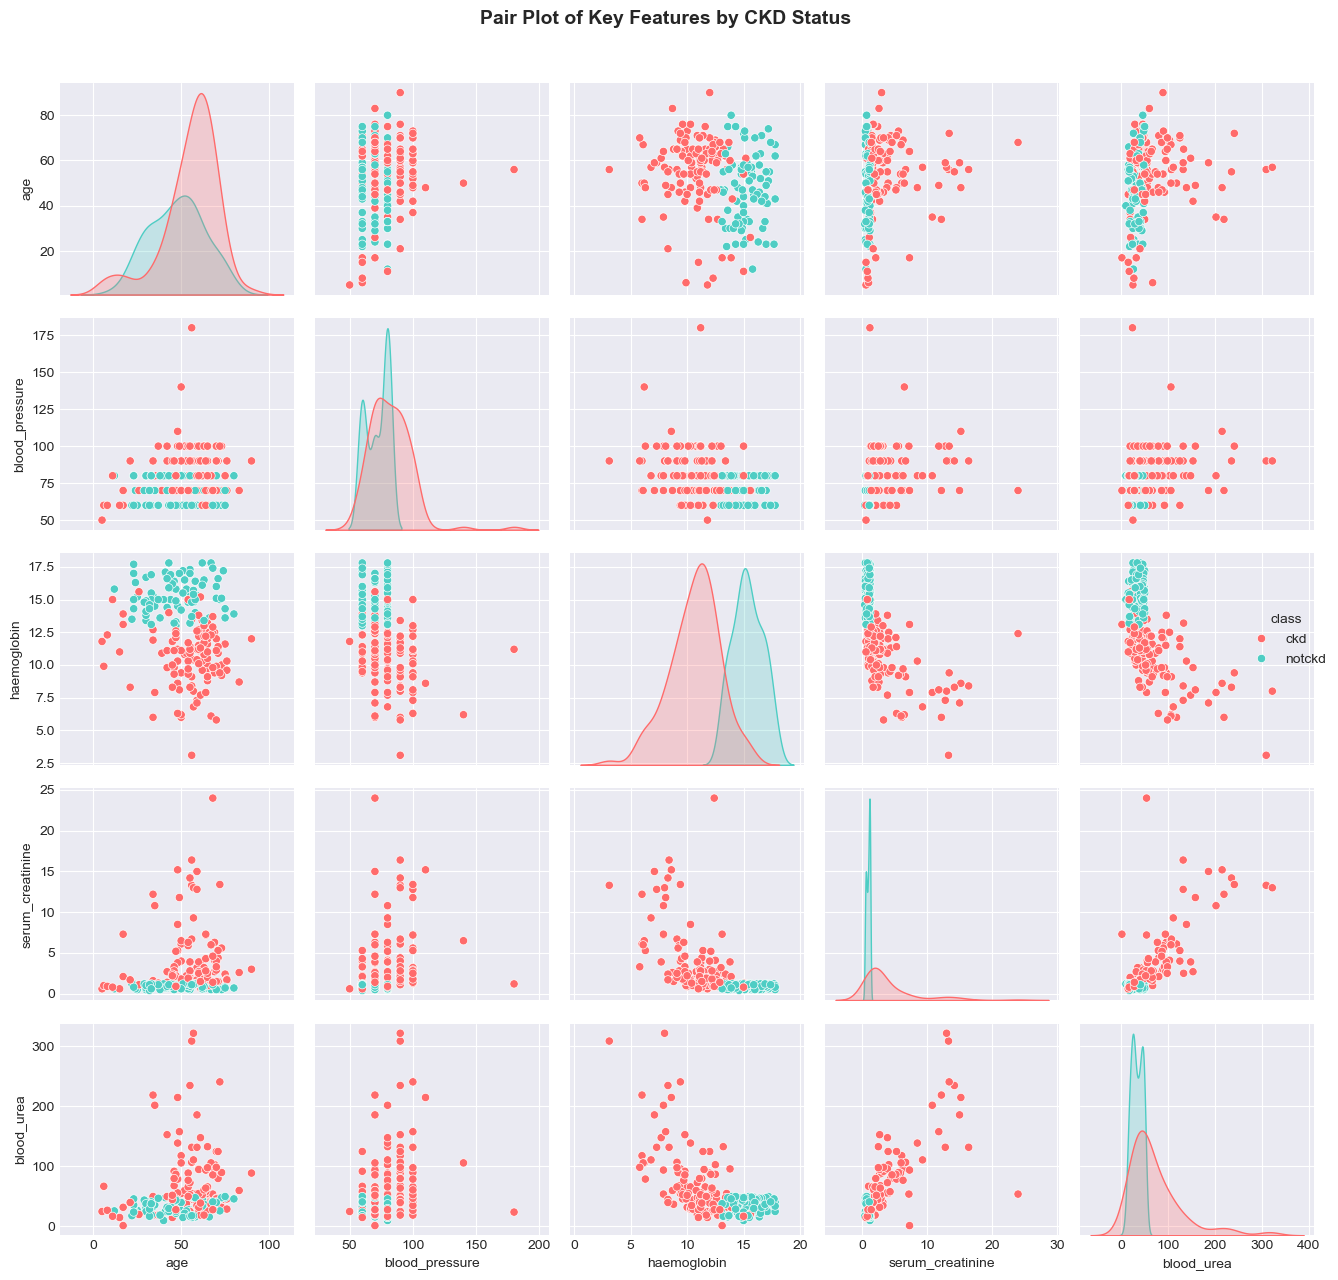

In [24]:
# Pair plot for key features
if 'class' in df.columns:
    key_features_pair = ['age', 'blood_pressure', 'haemoglobin', 'serum_creatinine', 'blood_urea', 'class']
    key_features_pair = [f for f in key_features_pair if f in df.columns]
    
    if len(key_features_pair) > 1:
        print("="*60)
        print("PAIR PLOT OF KEY FEATURES")
        print("="*60)
        
        # Sample data if too large
        sample_size = min(200, len(df))
        df_sample = df[key_features_pair].dropna().sample(n=sample_size, random_state=42)
        
        if len(df_sample) > 0:
            sns.pairplot(df_sample, hue='class', diag_kind='kde', palette=['#FF6B6B', '#4ECDC4'])
            plt.suptitle('Pair Plot of Key Features by CKD Status', y=1.02, fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.savefig('images/pair_plot_keyfeatures.png', dpi=300, bbox_inches='tight')
            plt.show()


8. **Early Train-Test Split**

In [25]:
# CRITICAL: Split data EARLY to prevent data leakage
# We'll use sklearn Pipeline which automatically prevents leakage

print("="*60)
print("EARLY TRAIN-TEST SPLIT (Before Preprocessing)")
print("="*60)
print("\nWARNING: IMPORTANT: Splitting data BEFORE preprocessing")
print("   - Pipeline will fit on train set only")
print("   - Test set will be transformed using train-fitted pipeline")
print("   - This automatically prevents data leakage")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare for split
X_for_split = df.drop('class', axis=1).copy()
y_for_split = df['class'].copy()

# Split into train and test sets (80/20, stratified)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_for_split,
    y_for_split,
    test_size=0.2,
    random_state=42,
    stratify=y_for_split
)

# Encode target variable
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train_raw)
y_test = le_target.transform(y_test_raw)

print(f"\nData Split Complete:")
print(f"   - Train set: {X_train_raw.shape[0]} samples ({X_train_raw.shape[0]/len(X_for_split)*100:.1f}%)")
print(f"   - Test set: {X_test_raw.shape[0]} samples ({X_test_raw.shape[0]/len(X_for_split)*100:.1f}%)")
print(f"   - Features: {X_train_raw.shape[1]}")

# Check class distribution
print(f"\nClass distribution:")
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()
print(f"  Train set:")
for idx, count in train_dist.items():
    class_name = le_target.inverse_transform([idx])[0]
    print(f"    {class_name}: {count} ({count/len(y_train)*100:.1f}%)")
print(f"  Test set:")
for idx, count in test_dist.items():
    class_name = le_target.inverse_transform([idx])[0]
    print(f"    {class_name}: {count} ({count/len(y_test)*100:.1f}%)")

print(f"\nNext Steps:")
print(f"   1. Create sklearn Pipeline for preprocessing")
print(f"   2. Fit pipeline on train set")
print(f"   3. Transform train and test sets")
print(f"   4. Feature selection on train set only")
print(f"   5. Train models")

print("\n" + "="*60)


EARLY TRAIN-TEST SPLIT (Before Preprocessing)

   - Pipeline will fit on train set only
   - Test set will be transformed using train-fitted pipeline
   - This automatically prevents data leakage

Data Split Complete:
   - Train set: 320 samples (80.0%)
   - Test set: 80 samples (20.0%)
   - Features: 24

Class distribution:
  Train set:
    ckd: 200 (62.5%)
    notckd: 120 (37.5%)
  Test set:
    ckd: 50 (62.5%)
    notckd: 30 (37.5%)

Next Steps:
   1. Create sklearn Pipeline for preprocessing
   2. Fit pipeline on train set
   3. Transform train and test sets
   4. Feature selection on train set only
   5. Train models



9. **Modular Preprocessing Pipeline**

In [26]:
# Modular Preprocessing Pipeline using sklearn Pipeline
# Separate transformers for each step

print("="*60)
print("CREATING MODULAR PREPROCESSING PIPELINE")
print("="*60)
print("\nUsing sklearn Pipeline approach:")
print("  1. Numerical Imputation (KNN)")
print("  2. Categorical Imputation (Mode)")
print("  3. Feature Engineering (Custom Transformer)")
print("  4. Categorical Encoding (Custom Transformer)")
print("  5. Scaling (StandardScaler)")

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ============================================================================
# STEP 1: Feature Engineering Transformer
# ============================================================================
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    """Create engineered features: age groups, composite scores, ratios, risk factors"""
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Age groups
        if 'age' in X.columns:
            X['age_group'] = pd.cut(X['age'], bins=[0, 30, 50, 70, 100], 
                                    labels=[0, 1, 2, 3], include_lowest=True)
            X['age_group'] = X['age_group'].astype(float)
        
        # Composite scores
        if all(col in X.columns for col in ['haemoglobin', 'packed_cell_volume', 'red_blood_cell_count']):
            # Convert to numeric and handle any string values
            hemo_numeric = pd.to_numeric(X['haemoglobin'], errors='coerce')
            pcv_numeric = pd.to_numeric(X['packed_cell_volume'], errors='coerce')
            rbcc_numeric = pd.to_numeric(X['red_blood_cell_count'], errors='coerce')
            
            hemo_max = hemo_numeric.max() if pd.notna(hemo_numeric.max()) and hemo_numeric.max() > 0 else 1
            pcv_max = pcv_numeric.max() if pd.notna(pcv_numeric.max()) and pcv_numeric.max() > 0 else 1
            rbcc_max = rbcc_numeric.max() if pd.notna(rbcc_numeric.max()) and rbcc_numeric.max() > 0 else 1
            
            if pd.notna(hemo_max) and pd.notna(pcv_max) and pd.notna(rbcc_max):
                X['blood_cell_score'] = (
                    (hemo_numeric / hemo_max) * 0.5 +
                    (pcv_numeric / pcv_max) * 0.3 +
                    (rbcc_numeric / rbcc_max) * 0.2
                )
        
        if all(col in X.columns for col in ['blood_urea', 'serum_creatinine']):
            # Convert to numeric and handle any string values
            bu_numeric = pd.to_numeric(X['blood_urea'], errors='coerce')
            sc_numeric = pd.to_numeric(X['serum_creatinine'], errors='coerce')
            
            bu_max = bu_numeric.max() if pd.notna(bu_numeric.max()) and bu_numeric.max() > 0 else 1
            sc_max = sc_numeric.max() if pd.notna(sc_numeric.max()) and sc_numeric.max() > 0 else 1
            
            if pd.notna(bu_max) and pd.notna(sc_max):
                X['kidney_function_score'] = (
                    (bu_numeric / bu_max) * 0.4 +
                    (sc_numeric / sc_max) * 0.6
                )
        
        if all(col in X.columns for col in ['sodium', 'potassium']):
            # Convert to numeric and handle any string values
            sod_numeric = pd.to_numeric(X['sodium'], errors='coerce')
            pot_numeric = pd.to_numeric(X['potassium'], errors='coerce')
            
            sod_max = sod_numeric.max() if pd.notna(sod_numeric.max()) and sod_numeric.max() > 0 else 1
            pot_max = pot_numeric.max() if pd.notna(pot_numeric.max()) and pot_numeric.max() > 0 else 1
            
            if pd.notna(sod_max) and pd.notna(pot_max):
                X['electrolyte_balance'] = (
                    (sod_numeric / sod_max) * 0.5 +
                    (pot_numeric / pot_max) * 0.5
                )
        
        # Ratio features
        if all(col in X.columns for col in ['blood_urea', 'serum_creatinine']):
            bu_numeric = pd.to_numeric(X['blood_urea'], errors='coerce')
            sc_numeric = pd.to_numeric(X['serum_creatinine'], errors='coerce')
            X['bun_creatinine_ratio'] = bu_numeric / (sc_numeric + 0.1)
        
        if all(col in X.columns for col in ['haemoglobin', 'age']):
            hemo_numeric = pd.to_numeric(X['haemoglobin'], errors='coerce')
            age_numeric = pd.to_numeric(X['age'], errors='coerce')
            X['hemo_age_ratio'] = hemo_numeric / (age_numeric + 1)
        
        if all(col in X.columns for col in ['sodium', 'potassium']):
            sod_numeric = pd.to_numeric(X['sodium'], errors='coerce')
            pot_numeric = pd.to_numeric(X['potassium'], errors='coerce')
            X['sod_pot_ratio'] = sod_numeric / (pot_numeric + 0.1)
        
        if all(col in X.columns for col in ['white_blood_cell_count', 'red_blood_cell_count']):
            wbc_numeric = pd.to_numeric(X['white_blood_cell_count'], errors='coerce')
            rbc_numeric = pd.to_numeric(X['red_blood_cell_count'], errors='coerce')
            X['wbc_rbc_ratio'] = wbc_numeric / (rbc_numeric + 0.1)
        
        # Risk factor count
        risk_cols = ['hypertension', 'diabetes_mellitus', 'coronary_artery_disease']
        X['risk_factor_count'] = sum([
            (X[col] == 'yes').astype(int) if col in X.columns else pd.Series(0, index=X.index)
            for col in risk_cols
        ])
        
        return X

# ============================================================================
# STEP 2: Categorical Encoding Transformer
# ============================================================================
class CategoricalEncodingTransformer(BaseEstimator, TransformerMixin):
    """Encode categorical variables using LabelEncoder"""
    
    def fit(self, X, y=None):
        self.categorical_cols_ = X.select_dtypes(include=['object']).columns.tolist()
        self.encoders_ = {}
        
        for col in self.categorical_cols_:
            le = LabelEncoder()
            le.fit(X[col].astype(str))
            self.encoders_[col] = le
        
        return self
    
    def transform(self, X):
        X = X.copy()
        
        for col in self.categorical_cols_:
            if col in X.columns:
                X[f'{col}_encoded'] = self.encoders_[col].transform(X[col].astype(str))
        
        # Drop original categorical columns after encoding (keep only encoded versions)
        # This prevents StandardScaler from trying to scale categorical strings
        X = X.drop(columns=self.categorical_cols_, errors='ignore')
        
        return X

# ============================================================================
# STEP 3: Imputation Transformers (Separate for Numerical and Categorical)
# ============================================================================
class NumericalImputer(BaseEstimator, TransformerMixin):
    """Impute numerical columns using KNN"""
    
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.numerical_cols_ = X.select_dtypes(include=[np.number]).columns.tolist()
            if len(self.numerical_cols_) > 0:
                self.imputer_ = KNNImputer(n_neighbors=5)
                self.imputer_.fit(X[self.numerical_cols_].values)
        return self
    
    def transform(self, X):
        X = X.copy()
        if isinstance(X, pd.DataFrame) and len(self.numerical_cols_) > 0:
            X_imputed = self.imputer_.transform(X[self.numerical_cols_].values)
            X[self.numerical_cols_] = X_imputed
        return X

class CategoricalImputer(BaseEstimator, TransformerMixin):
    """Impute categorical columns using mode (separate imputer per column)"""
    
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.categorical_cols_ = X.select_dtypes(include=['object']).columns.tolist()
            self.imputers_ = {}
            for col in self.categorical_cols_:
                self.imputers_[col] = SimpleImputer(strategy='most_frequent')
                self.imputers_[col].fit(X[[col]].values)
        return self
    
    def transform(self, X):
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            for col in self.categorical_cols_:
                if col in X.columns:
                    col_imputed = self.imputers_[col].transform(X[[col]].values).flatten()
                    X[col] = col_imputed
        return X

# ============================================================================
# STEP 4: Numeric Column Selector (Before StandardScaler)
# ============================================================================
class NumericColumnSelector(BaseEstimator, TransformerMixin):
    """Select only numeric columns before scaling"""
    
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            # Get numeric columns (including encoded categorical columns)
            self.numeric_cols_ = X.select_dtypes(include=[np.number]).columns.tolist()
        return self
    
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            # Select only numeric columns
            X_numeric = X[self.numeric_cols_].copy()
            return X_numeric
        return X

# ============================================================================
# CREATE PREPROCESSING PIPELINE
# ============================================================================
# Identify column types
numerical_cols = X_train_raw.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train_raw.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumn types identified:")
print(f"  Numerical: {len(numerical_cols)} columns")
print(f"  Categorical: {len(categorical_cols)} columns")

# Chain all transformers in a Pipeline
preprocessing_pipeline = Pipeline([
    ('num_imputation', NumericalImputer()),
    ('cat_imputation', CategoricalImputer()),
    ('feature_engineering', FeatureEngineeringTransformer()),
    ('encoding', CategoricalEncodingTransformer()),
    ('numeric_selector', NumericColumnSelector()),  # Select only numeric columns
    ('scaling', StandardScaler())
])

print("\nPipeline created successfully!")
print("Pipeline steps:")
for i, (name, transformer) in enumerate(preprocessing_pipeline.steps, 1):
    print(f"  {i}. {name}: {type(transformer).__name__}")

# ============================================================================
# FIT AND TRANSFORM PIPELINE
# ============================================================================
print("\n" + "="*60)
print("FITTING AND TRANSFORMING PIPELINE")
print("="*60)

# Fit pipeline on training data
print("\nFitting preprocessing pipeline on training data...")
X_train_processed = preprocessing_pipeline.fit_transform(X_train_raw)

# Transform test set using fitted pipeline
print("Transforming test set using fitted pipeline...")
X_test_processed = preprocessing_pipeline.transform(X_test_raw)

# Convert to DataFrame (pipeline returns arrays after scaling)
# Get feature names - need to track through pipeline steps
# After all steps: numerical + engineered + encoded (categorical columns dropped)
all_feature_names = []
all_feature_names.extend(numerical_cols)  # Numerical (imputed)
# Engineered features
engineered_features = ['age_group', 'blood_cell_score', 'kidney_function_score', 
                      'electrolyte_balance', 'bun_creatinine_ratio', 'hemo_age_ratio',
                      'sod_pot_ratio', 'wbc_rbc_ratio', 'risk_factor_count']
all_feature_names.extend(engineered_features)
# Encoded features (original categorical columns are dropped, only encoded versions remain)
for col in categorical_cols:
    all_feature_names.append(f'{col}_encoded')

# Create DataFrames (use appropriate number of columns)
X_train_processed = pd.DataFrame(X_train_processed, 
                                 columns=all_feature_names[:X_train_processed.shape[1]],
                                 index=X_train_raw.index)
X_test_processed = pd.DataFrame(X_test_processed,
                                columns=all_feature_names[:X_test_processed.shape[1]],
                                index=X_test_raw.index)

print(f"\nPipeline fitted and transformed successfully!")
print(f"  Train set processed: {X_train_processed.shape}")
print(f"  Test set processed: {X_test_processed.shape}")
print(f"  Features created: {len(X_train_processed.columns)}")
print(f"  Sample features: {list(X_train_processed.columns[:10])}")

print("\n" + "="*60)
print("PREPROCESSING COMPLETE - NO DATA LEAKAGE")
print("="*60)
print("\nPipeline ensures:")
print("  - Imputation fitted on train only")
print("  - Encoders fitted on train only")
print("  - Scaler fitted on train only")
print("  - Test set transformed using train-fitted components")
print("="*60)


CREATING MODULAR PREPROCESSING PIPELINE

Using sklearn Pipeline approach:
  1. Numerical Imputation (KNN)
  2. Categorical Imputation (Mode)
  3. Feature Engineering (Custom Transformer)
  4. Categorical Encoding (Custom Transformer)
  5. Scaling (StandardScaler)

Column types identified:
  Numerical: 14 columns
  Categorical: 10 columns

Pipeline created successfully!
Pipeline steps:
  1. num_imputation: NumericalImputer
  2. cat_imputation: CategoricalImputer
  3. feature_engineering: FeatureEngineeringTransformer
  4. encoding: CategoricalEncodingTransformer
  5. numeric_selector: NumericColumnSelector
  6. scaling: StandardScaler

FITTING AND TRANSFORMING PIPELINE

Fitting preprocessing pipeline on training data...
Transforming test set using fitted pipeline...

Pipeline fitted and transformed successfully!
  Train set processed: (320, 33)
  Test set processed: (80, 33)
  Features created: 33
  Sample features: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'bloo

In [27]:
# Data is already processed by Pipeline
# X_train_processed and X_test_processed are ready for feature selection and modeling

print("="*60)
print("DATA READY FOR FEATURE SELECTION AND MODELING")
print("="*60)
print("\nWARNING: Data already processed by sklearn Pipeline")
print("   - Train set: X_train_processed (fitted pipeline)")
print("   - Test set: X_test_processed (transformed pipeline)")
print("   - Target: y_train, y_test (already encoded)")
print("   - No manual split restoration needed - Pipeline handles it automatically")

# Use pipeline-processed data
X_train_final = X_train_processed.copy()
X_test_final = X_test_processed.copy()
y_train_final = y_train.copy()
y_test_final = y_test.copy()

print(f"\nProcessed datasets:")
print(f"   - Training set: {X_train_final.shape[0]} samples, {X_train_final.shape[1]} features")
print(f"   - Test set: {X_test_final.shape[0]} samples, {X_test_final.shape[1]} features")
print(f"   - Target: {y_train_final.shape[0]} train, {y_test_final.shape[0]} test")

# Check class distribution
print(f"\nClass distribution:")
train_dist_final = pd.Series(y_train_final).value_counts().sort_index()
test_dist_final = pd.Series(y_test_final).value_counts().sort_index()
print(f"  Training set:")
for idx, count in train_dist_final.items():
    class_name = le_target.inverse_transform([idx])[0]
    print(f"    {class_name}: {count} ({count/len(y_train_final)*100:.1f}%)")
print(f"  Test set:")
for idx, count in test_dist_final.items():
    class_name = le_target.inverse_transform([idx])[0]
    print(f"    {class_name}: {count} ({count/len(y_test_final)*100:.1f}%)")

print(f"\nNext Steps:")
print(f"   1. Feature selection on train set only")
print(f"   2. Train baseline models")
print(f"   3. Evaluate performance")

print("\n" + "="*60)


DATA READY FOR FEATURE SELECTION AND MODELING

   - Train set: X_train_processed (fitted pipeline)
   - Test set: X_test_processed (transformed pipeline)
   - Target: y_train, y_test (already encoded)
   - No manual split restoration needed - Pipeline handles it automatically

Processed datasets:
   - Training set: 320 samples, 33 features
   - Test set: 80 samples, 33 features
   - Target: 320 train, 80 test

Class distribution:
  Training set:
    ckd: 200 (62.5%)
    notckd: 120 (37.5%)
  Test set:
    ckd: 50 (62.5%)
    notckd: 30 (37.5%)

Next Steps:
   1. Feature selection on train set only
   2. Train baseline models
   3. Evaluate performance



10. **Feature Selection**

FEATURE SELECTION: REDUCING DIMENSIONALITY


Current situation:
  - Total features: 33
  - Train samples: 320
  - Samples per feature: 9.70
  - Target: 20-30 features (13-20 samples per feature)

STEP 1: REMOVE REDUNDANT FEATURES

1. Removing normalized features (0 features):
   Reason: Apply StandardScaler during preprocessing pipeline instead

 Removed 0 redundant features
   Features remaining: 33

STEP 2: FEATURE IMPORTANCE ANALYSIS (TRAIN SET ONLY)

Training Random Forest on TRAIN SET to assess feature importance...

Top 30 Features by Importance:
------------------------------------------------------------
blood_cell_score                    0.1605
specific_gravity                    0.1530
haemoglobin                         0.1331
serum_creatinine                    0.0957
albumin                             0.0809
packed_cell_volume                  0.0678
risk_factor_count                   0.0474
hemo_age_ratio                      0.0319
bun_creatinine_ratio                

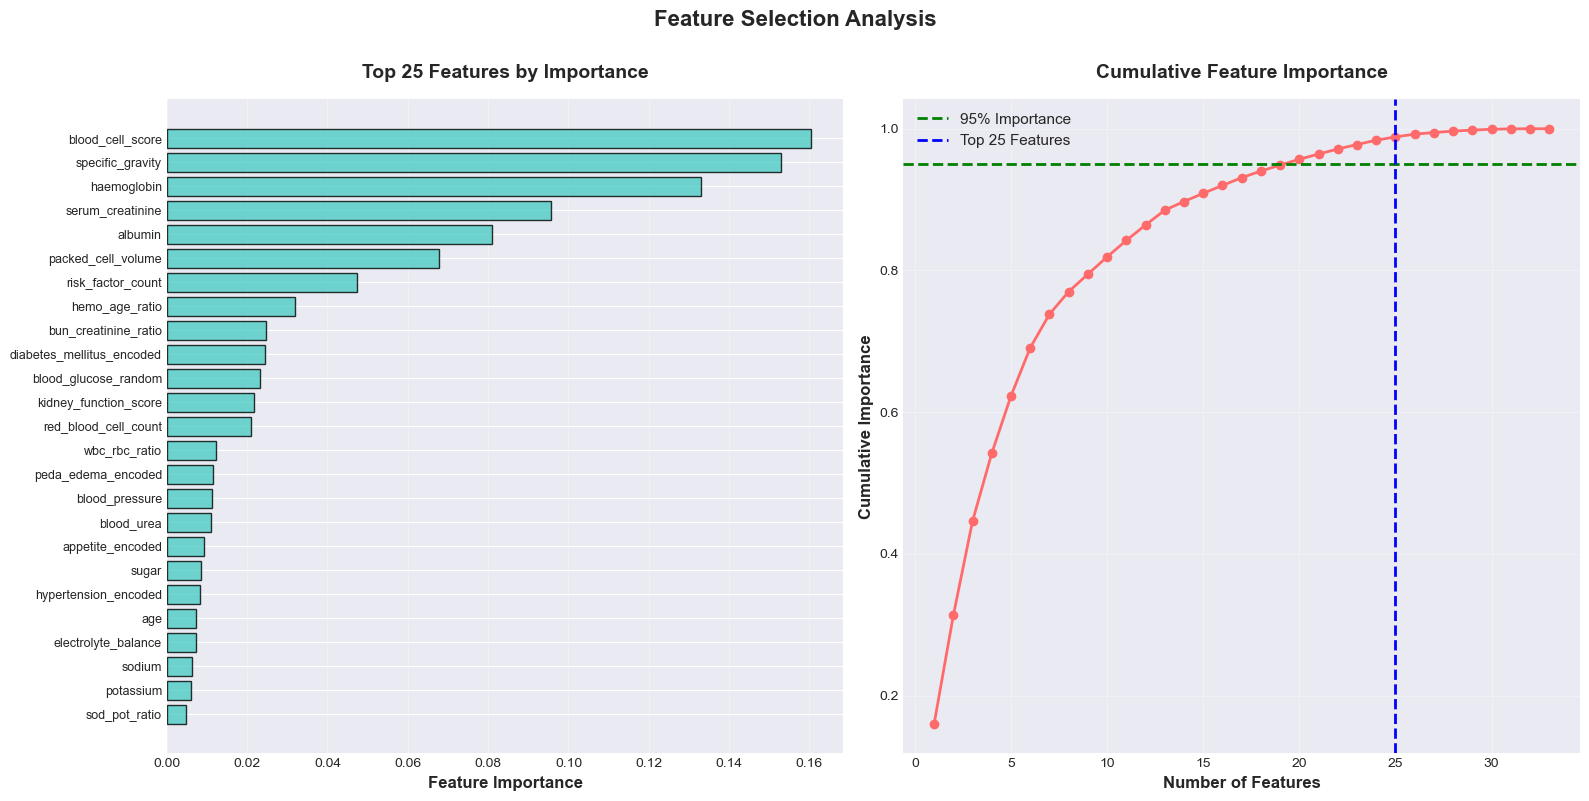


Visualization saved to 'images/feature_selection_analysis.png'

Top 25 features account for 98.84% of total importance

FEATURE SELECTION SUMMARY

 Final Dataset Ready for Modeling:
   - Features: 25
   - Train samples: 320
   - Test samples: 80
   - Samples per feature: 12.80
   - Cumulative importance: 98.84%

 Next Steps:
   1. Scale features (fit on train, transform test)
   2. Train baseline models
   3. Evaluate performance



In [28]:
# Feature Selection: Reduce from 58 to 20-30 optimal features
# CRITICAL: Use TRAIN SET ONLY for feature selection (no data leakage)

print("="*60)
print("FEATURE SELECTION: REDUCING DIMENSIONALITY")
print("="*60)
print("\nWARNING:  Using TRAIN SET ONLY for feature selection (prevents data leakage)")

print(f"\nCurrent situation:")
print(f"  - Total features: {X_train_final.shape[1]}")
print(f"  - Train samples: {X_train_final.shape[0]}")
print(f"  - Samples per feature: {X_train_final.shape[0] / X_train_final.shape[1]:.2f}")
print(f"  - Target: 20-30 features (13-20 samples per feature)")

# Step 1: Remove redundant features
print("\n" + "="*60)
print("STEP 1: REMOVE REDUNDANT FEATURES")
print("="*60)

features_to_remove = []

# 1. Remove normalized features (apply scaling during preprocessing instead)
normalized_features = [col for col in X_train_final.columns if col.endswith('_normalized')]
features_to_remove.extend(normalized_features)
print(f"\n1. Removing normalized features ({len(normalized_features)} features):")
print(f"   Reason: Apply StandardScaler during preprocessing pipeline instead")
for feat in normalized_features[:5]:
    print(f"   - {feat}")
if len(normalized_features) > 5:
    print(f"   ... and {len(normalized_features) - 5} more")

# 2. Remove label features (keep encoded/numeric versions)
label_features = [col for col in X_train_final.columns if col.endswith('_label')]
features_to_remove.extend(label_features)
if label_features:
    print(f"\n2. Removing label features ({len(label_features)} features):")
    for feat in label_features:
        print(f"   - {feat}")

# Remove the features from train and test
X_train_feat_sel = X_train_final.drop(columns=features_to_remove, errors='ignore')
X_test_feat_sel = X_test_final.drop(columns=features_to_remove, errors='ignore')
print(f"\n Removed {len(features_to_remove)} redundant features")
print(f"   Features remaining: {X_train_feat_sel.shape[1]}")

# Step 2: Feature Importance Analysis (TRAIN SET ONLY)
print("\n" + "="*60)
print("STEP 2: FEATURE IMPORTANCE ANALYSIS (TRAIN SET ONLY)")
print("="*60)

from sklearn.ensemble import RandomForestClassifier

# Handle any remaining non-numeric features in train set
X_train_feat_sel_encoded = X_train_feat_sel.copy()
for col in X_train_feat_sel_encoded.select_dtypes(include=['object']).columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    X_train_feat_sel_encoded[col] = le.fit_transform(X_train_feat_sel_encoded[col].astype(str))

# Train Random Forest on TRAIN SET ONLY to get feature importance
print("\nTraining Random Forest on TRAIN SET to assess feature importance...")
rf_feat_sel = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_feat_sel.fit(X_train_feat_sel_encoded, y_train_final)

# Get feature importance
feature_importance_df = pd.DataFrame({
    'feature': X_train_feat_sel_encoded.columns,
    'importance': rf_feat_sel.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 30 Features by Importance:")
print("-" * 60)
for idx, row in feature_importance_df.head(30).iterrows():
    print(f"{row['feature']:35s} {row['importance']:.4f}")

# Step 3: Select Top Features
print("\n" + "="*60)
print("STEP 3: SELECT TOP FEATURES")
print("="*60)

# Select top 25 features (optimal for 320 train samples)
n_top_features = 25
top_features = feature_importance_df.head(n_top_features)['feature'].tolist()

print(f"\nSelected top {n_top_features} features:")
print("-" * 60)
for i, feat in enumerate(top_features, 1):
    importance = feature_importance_df[feature_importance_df['feature'] == feat]['importance'].values[0]
    print(f"{i:2d}. {feat:35s} (importance: {importance:.4f})")

# Apply feature selection to train and test sets
X_train_selected = X_train_feat_sel[top_features].copy()
X_test_selected = X_test_feat_sel[top_features].copy()

# Also encode test set categorical features (using train encoders)
X_test_feat_sel_encoded = X_test_feat_sel.copy()
for col in X_test_feat_sel_encoded.select_dtypes(include=['object']).columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # Fit on train, transform test
    le.fit(X_train_feat_sel[col].astype(str))
    X_test_feat_sel_encoded[col] = le.transform(X_test_feat_sel_encoded[col].astype(str))

print(f"\n Feature Selection Complete!")
print(f"   - Original features: {X_train_final.shape[1]}")
print(f"   - After removing redundant: {X_train_feat_sel.shape[1]}")
print(f"   - Final selected features: {len(top_features)}")
print(f"   - Train samples per feature: {X_train_selected.shape[0] / len(top_features):.2f}")
print(f"   - Test samples per feature: {X_test_selected.shape[0] / len(top_features):.2f}")

# Step 4: Visualize Feature Importance
print("\n" + "="*60)
print("STEP 4: FEATURE IMPORTANCE VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Top 25 Features
ax1 = axes[0]
top_25 = feature_importance_df.head(25)
ax1.barh(range(len(top_25)), top_25['importance'].values, color='#4ECDC4', alpha=0.8, edgecolor='black')
ax1.set_yticks(range(len(top_25)))
ax1.set_yticklabels(top_25['feature'].values, fontsize=9)
ax1.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
ax1.set_title('Top 25 Features by Importance', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='x')
ax1.set_axisbelow(True)
ax1.invert_yaxis()

# Plot 2: Cumulative Importance
ax2 = axes[1]
cumulative_importance = feature_importance_df['importance'].cumsum()
ax2.plot(range(1, len(cumulative_importance) + 1), cumulative_importance.values, 
         marker='o', linewidth=2, markersize=6, color='#FF6B6B')
ax2.axhline(y=0.95, color='green', linestyle='--', linewidth=2, label='95% Importance')
ax2.axvline(x=n_top_features, color='blue', linestyle='--', linewidth=2, label=f'Top {n_top_features} Features')
ax2.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_axisbelow(True)

plt.suptitle('Feature Selection Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('images/feature_selection_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nVisualization saved to 'images/feature_selection_analysis.png'")

# Calculate cumulative importance of top features
cumulative_importance_top = feature_importance_df.head(n_top_features)['importance'].sum()
print(f"\nTop {n_top_features} features account for {cumulative_importance_top*100:.2f}% of total importance")

# Summary
print("\n" + "="*60)
print("FEATURE SELECTION SUMMARY")
print("="*60)
print(f"\n Final Dataset Ready for Modeling:")
print(f"   - Features: {len(top_features)}")
print(f"   - Train samples: {X_train_selected.shape[0]}")
print(f"   - Test samples: {X_test_selected.shape[0]}")
print(f"   - Samples per feature: {X_train_selected.shape[0] / len(top_features):.2f}")
print(f"   - Cumulative importance: {cumulative_importance_top*100:.2f}%")
print(f"\n Next Steps:")
print(f"   1. Scale features (fit on train, transform test)")
print(f"   2. Train baseline models")
print(f"   3. Evaluate performance")

print("\n" + "="*60)


In [29]:
# Scale Features: Prepare selected features for modeling
# Data is already split - just need to scale features

print("="*60)
print("FEATURE SCALING: PREPARING DATA FOR MODELING")
print("="*60)
print("\nWARNING:  Data already split (from Cell 51)")
print("   - Using selected features from feature selection")
print("   - Scaling: fit on train, transform test")

from sklearn.preprocessing import StandardScaler

# Handle any remaining non-numeric features
print(f"\nChecking for non-numeric features...")
non_numeric_cols_train = X_train_selected.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols_train:
    print(f"  Found {len(non_numeric_cols_train)} non-numeric features: {non_numeric_cols_train}")
    # Encode using train set encoders (already done in feature selection)
    # Just ensure test set is also encoded
    for col in non_numeric_cols_train:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        le.fit(X_train_selected[col].astype(str))
        X_train_selected[col] = le.transform(X_train_selected[col].astype(str))
        X_test_selected[col] = le.transform(X_test_selected[col].astype(str))
    print(f"   All features encoded")
else:
    print(f"   All features are numeric")

print(f"\nDataset shape:")
print(f"  - Training set: {X_train_selected.shape[0]} samples, {X_train_selected.shape[1]} features")
print(f"  - Test set: {X_test_selected.shape[0]} samples, {X_test_selected.shape[1]} features")
print(f"  - Target: {y_train_final.shape[0]} train, {y_test_final.shape[0]} test")

# Scale features (StandardScaler) - fit on train, transform test
print(f"\nScaling features (fit on train, transform test)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns, index=X_train_selected.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_selected.columns, index=X_test_selected.index)

# Use y_train_final and y_test_final (already encoded from Cell 51)
y_train = y_train_final
y_test = y_test_final

print(f"   Features scaled (mean=0, std=1)")
print(f"  Training set mean: {X_train_scaled.mean().mean():.6f}")
print(f"  Training set std: {X_train_scaled.std().mean():.6f}")

print("\n" + "="*60)
print("DATA READY FOR MODEL TRAINING")
print("="*60)
print(f"\n Prepared datasets:")
print(f"  - X_train_scaled: {X_train_scaled.shape}")
print(f"  - X_test_scaled: {X_test_scaled.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - y_test: {y_test.shape}")
print(f"\n Next: Train baseline models")
print("\nWARNING:  Note: All preprocessing done correctly - NO DATA LEAKAGE")
print("   - Imputation: Train conditional mode, Test global mode from train")
print("   - Feature selection: Train set only")
print("   - Scaling: Fit on train, transform test")
print("="*60)


FEATURE SCALING: PREPARING DATA FOR MODELING

   - Using selected features from feature selection
   - Scaling: fit on train, transform test

Checking for non-numeric features...
   All features are numeric

Dataset shape:
  - Training set: 320 samples, 25 features
  - Test set: 80 samples, 25 features
  - Target: 320 train, 80 test

Scaling features (fit on train, transform test)...
   Features scaled (mean=0, std=1)
  Training set mean: -0.000000
  Training set std: 1.001566

DATA READY FOR MODEL TRAINING

 Prepared datasets:
  - X_train_scaled: (320, 25)
  - X_test_scaled: (80, 25)
  - y_train: (320,)
  - y_test: (80,)

 Next: Train baseline models

   - Imputation: Train conditional mode, Test global mode from train
   - Feature selection: Train set only
   - Scaling: Fit on train, transform test


11. **Baseline Model Training**

In [30]:
# Baseline Model Training: Compare Multiple Models
print("="*60)
print("BASELINE MODEL TRAINING: COMPARING MULTIPLE MODELS")
print("="*60)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, auc)
from sklearn.model_selection import cross_val_score
import time

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Store results
results = []

print(f"\nTraining {len(models)} baseline models...")
print("="*60)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)
    
    # Train model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1_Score': test_f1,
        'ROC_AUC': test_roc_auc,
        'CV_F1_Mean': cv_mean,
        'CV_F1_Std': cv_std,
        'Train_Time': train_time
    })
    
    # Print results
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")
    print(f"  Precision:       {test_precision:.4f}")
    print(f"  Recall:          {test_recall:.4f}")
    print(f"  F1-Score:        {test_f1:.4f}")
    if test_roc_auc:
        print(f"  ROC-AUC:         {test_roc_auc:.4f}")
    print(f"  CV F1-Score:     {cv_mean:.4f} (+/- {cv_std*2:.4f})")
    print(f"  Training Time:   {train_time:.4f}s")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1_Score', ascending=False)

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print("\nModels ranked by F1-Score:")
print("-" * 60)
print(results_df[['Model', 'Test_Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC', 'CV_F1_Mean']].to_string(index=False))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name}")
print(f"   F1-Score: {results_df.iloc[0]['F1_Score']:.4f}")
print(f"   Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")

print("\n" + "="*60)


BASELINE MODEL TRAINING: COMPARING MULTIPLE MODELS

Training 7 baseline models...

Logistic Regression:
----------------------------------------
  Train Accuracy: 1.0000
  Test Accuracy:  0.9875
  Precision:       0.9677
  Recall:          1.0000
  F1-Score:        0.9836
  ROC-AUC:         1.0000
  CV F1-Score:     0.9879 (+/- 0.0321)
  Training Time:   0.0080s

Decision Tree:
----------------------------------------
  Train Accuracy: 1.0000
  Test Accuracy:  0.9875
  Precision:       0.9677
  Recall:          1.0000
  F1-Score:        0.9836
  ROC-AUC:         0.9900
  CV F1-Score:     0.9167 (+/- 0.1043)
  Training Time:   0.0020s

Random Forest:
----------------------------------------
  Train Accuracy: 1.0000
  Test Accuracy:  0.9875
  Precision:       1.0000
  Recall:          0.9667
  F1-Score:        0.9831
  ROC-AUC:         0.9993
  CV F1-Score:     0.9704 (+/- 0.0339)
  Training Time:   0.0877s

Gradient Boosting:
----------------------------------------
  Train Accuracy: 1.

12. **Model Evaluation**

MODEL EVALUATION: DETAILED ANALYSIS

Confusion Matrix (Logistic Regression):
------------------------------------------------------------
                 Predicted: Not CKD  Predicted: CKD
Actual: Not CKD                  49               1
Actual: CKD                       0              30

Interpretation:
  True Negatives (TN):  49 - Correctly predicted Not CKD
  False Positives (FP): 1 - Incorrectly predicted CKD
  False Negatives (FN): 0 - Missed CKD cases
  True Positives (TP):  30 - Correctly predicted CKD

Classification Report (Logistic Regression):
------------------------------------------------------------
              precision    recall  f1-score   support

     Not CKD       1.00      0.98      0.99        50
         CKD       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



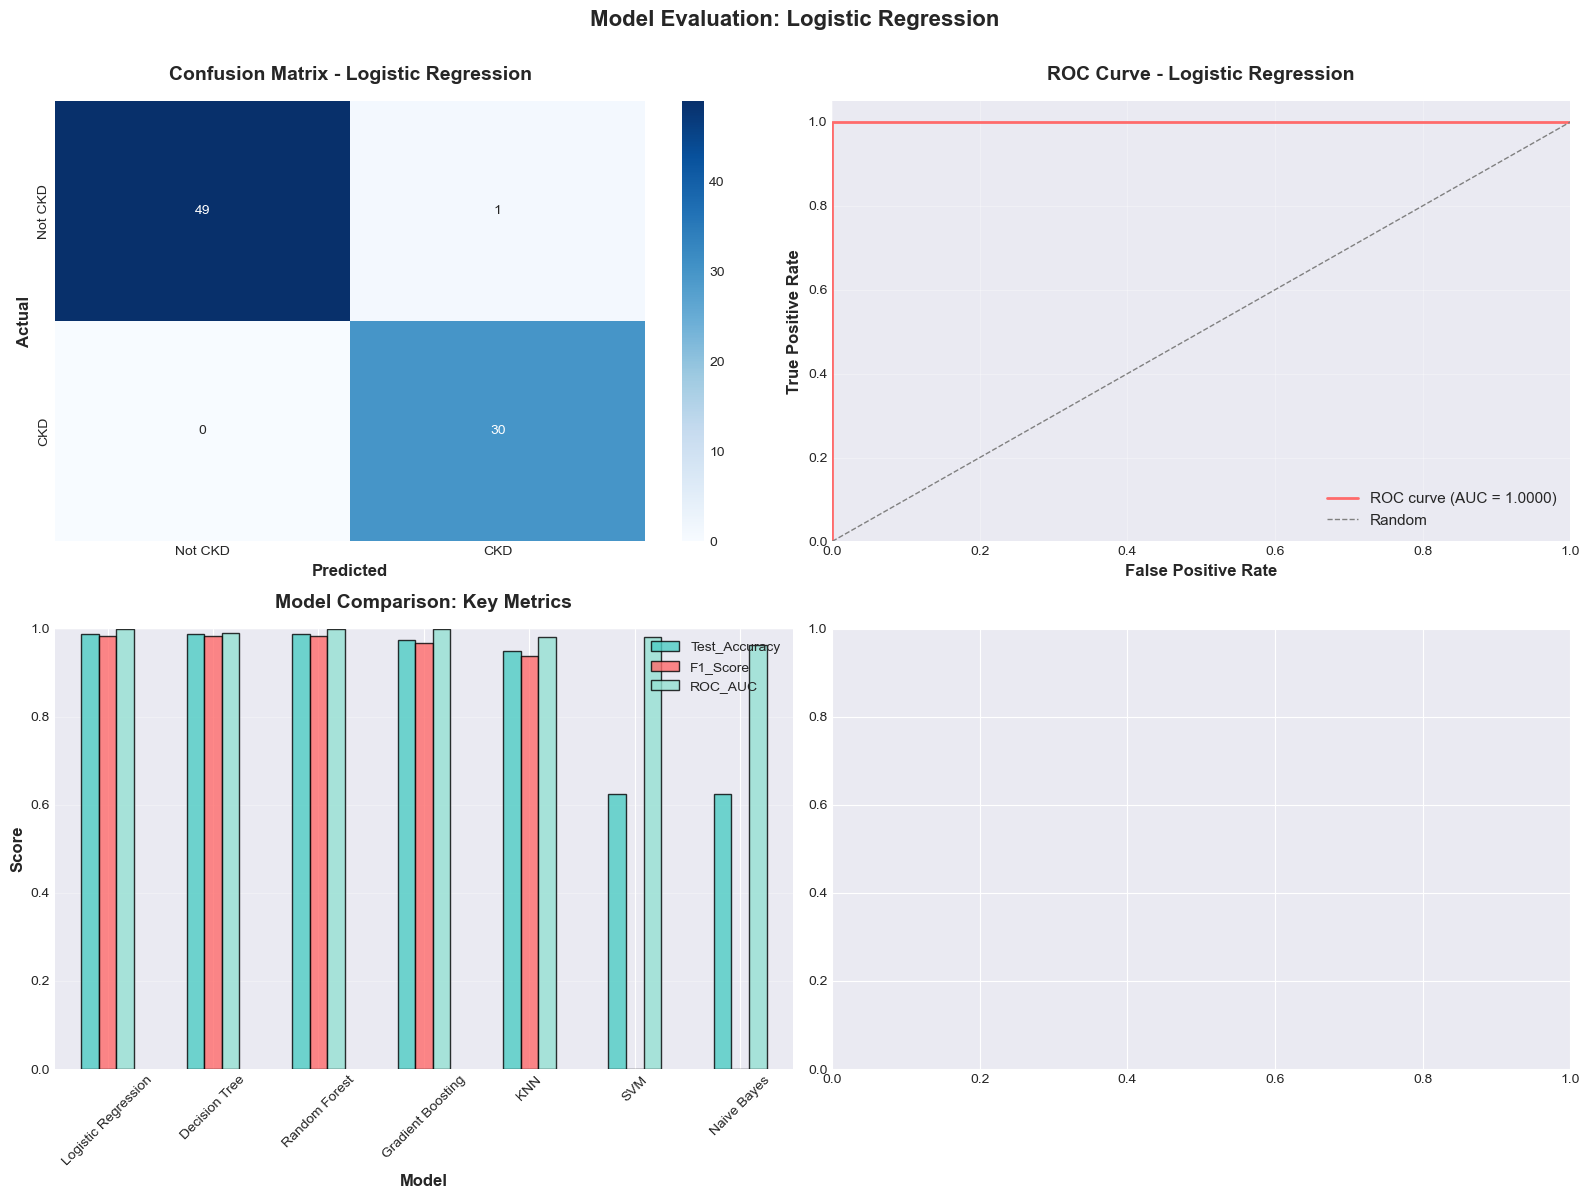


Visualization saved to 'images/baseline_model_evaluation.png'

BASELINE MODEL EVALUATION SUMMARY

 Best Model: Logistic Regression
   Test Accuracy: 0.9875
   F1-Score:      0.9836
   Precision:     0.9677
   Recall:        1.0000
   ROC-AUC:       1.0000
   CV F1-Score:   0.9879 (+/- 0.0321)



In [31]:
# Model Evaluation: Detailed Analysis of Best Model
print("="*60)
print("MODEL EVALUATION: DETAILED ANALYSIS")
print("="*60)

# Retrain best model for detailed evaluation
best_model.fit(X_train_scaled, y_train)
y_test_pred_best = best_model.predict(X_test_scaled)
y_test_proba_best = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Confusion Matrix
print(f"\nConfusion Matrix ({best_model_name}):")
print("-" * 60)
cm = confusion_matrix(y_test, y_test_pred_best)
cm_df = pd.DataFrame(cm, 
                     index=['Actual: Not CKD', 'Actual: CKD'],
                     columns=['Predicted: Not CKD', 'Predicted: CKD'])
print(cm_df)
print(f"\nInterpretation:")
print(f"  True Negatives (TN):  {cm[0,0]} - Correctly predicted Not CKD")
print(f"  False Positives (FP): {cm[0,1]} - Incorrectly predicted CKD")
print(f"  False Negatives (FN): {cm[1,0]} - Missed CKD cases")
print(f"  True Positives (TP):  {cm[1,1]} - Correctly predicted CKD")

# Classification Report
print(f"\nClassification Report ({best_model_name}):")
print("-" * 60)
class_names = ['Not CKD', 'CKD']
print(classification_report(y_test, y_test_pred_best, target_names=class_names))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1, 
            xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
ax1.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Actual', fontsize=12, fontweight='bold')
ax1.set_xlabel('Predicted', fontsize=12, fontweight='bold')

# 2. ROC Curve
ax2 = axes[0, 1]
if y_test_proba_best is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_best)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color='#FF6B6B', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    ax2.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax2.set_title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold', pad=15)
    ax2.legend(loc="lower right", fontsize=11)
    ax2.grid(True, alpha=0.3)
    ax2.set_axisbelow(True)

# 3. Model Comparison Bar Chart
ax3 = axes[1, 0]
comparison_metrics = ['Test_Accuracy', 'F1_Score', 'ROC_AUC']
comparison_data = results_df[['Model'] + comparison_metrics].set_index('Model')
comparison_data.plot(kind='bar', ax=ax3, color=['#4ECDC4', '#FF6B6B', '#95E1D3'], 
                     alpha=0.8, edgecolor='black', linewidth=1)
ax3.set_title('Model Comparison: Key Metrics', fontsize=14, fontweight='bold', pad=15)
ax3.set_ylabel('Score', fontsize=12, fontweight='bold')
ax3.set_xlabel('Model', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_axisbelow(True)
ax3.set_ylim([0, 1])

# 4. Feature Importance (if available)
ax4 = axes[1, 1]
if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)
    
    ax4.barh(range(len(feature_imp)), feature_imp['importance'].values, 
             color='#4ECDC4', alpha=0.8, edgecolor='black')
    ax4.set_yticks(range(len(feature_imp)))
    ax4.set_yticklabels(feature_imp['feature'].values, fontsize=9)
    ax4.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
    ax4.set_title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold', pad=15)
    ax4.grid(True, alpha=0.3, axis='x')
    ax4.set_axisbelow(True)
    ax4.invert_yaxis()
elif hasattr(best_model, 'coef_'):
    # For linear models, show coefficients
    if len(best_model.coef_.shape) == 1:
        coef_imp = pd.DataFrame({
            'feature': X_train_scaled.columns,
            'coefficient': best_model.coef_
        }).sort_values('coefficient', key=abs, ascending=False).head(15)
        
        colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in coef_imp['coefficient']]
        ax4.barh(range(len(coef_imp)), coef_imp['coefficient'].values, 
                 color=colors, alpha=0.8, edgecolor='black')
        ax4.set_yticks(range(len(coef_imp)))
        ax4.set_yticklabels(coef_imp['feature'].values, fontsize=9)
        ax4.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
        ax4.set_title(f'Top 15 Feature Coefficients - {best_model_name}', fontsize=14, fontweight='bold', pad=15)
        ax4.axvline(x=0, color='black', linestyle='-', linewidth=1)
        ax4.grid(True, alpha=0.3, axis='x')
        ax4.set_axisbelow(True)
        ax4.invert_yaxis()
else:
    ax4.text(0.5, 0.5, 'Feature importance\nnot available\nfor this model', 
             ha='center', va='center', fontsize=12, transform=ax4.transAxes)
    ax4.set_title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold', pad=15)

plt.suptitle(f'Model Evaluation: {best_model_name}', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('images/baseline_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nVisualization saved to 'images/baseline_model_evaluation.png'")

# Summary
print("\n" + "="*60)
print("BASELINE MODEL EVALUATION SUMMARY")
print("="*60)
print(f"\n Best Model: {best_model_name}")
print(f"   Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")
print(f"   F1-Score:      {results_df.iloc[0]['F1_Score']:.4f}")
print(f"   Precision:     {results_df.iloc[0]['Precision']:.4f}")
print(f"   Recall:        {results_df.iloc[0]['Recall']:.4f}")
if results_df.iloc[0]['ROC_AUC']:
    print(f"   ROC-AUC:       {results_df.iloc[0]['ROC_AUC']:.4f}")
print(f"   CV F1-Score:   {results_df.iloc[0]['CV_F1_Mean']:.4f} (+/- {results_df.iloc[0]['CV_F1_Std']*2:.4f})")


print("\n" + "="*60)
